In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import seaborn as sns

# Problem statement.
An education company, X Education, sells online courses for working professionals.
We have data on the browsing behavior and limited customer data. 
The goal is to build a model that assigns a lead score to each lead, indicating the likelihood of conversion.
A higher score implies a greater probability of the lead converting. 

In [5]:
data=pd.read_csv("Leads.csv")

In [6]:
data.shape

(9240, 37)

In [7]:
data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [8]:
data.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Data Understanding.

In [11]:
data['Converted'].value_counts(normalize=True)

Converted
0    0.61461
1    0.38539
Name: proportion, dtype: float64

In [12]:
#Checking for null values.
data.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [13]:
data[data['Asymmetrique Activity Index'].isnull()]["Lead Quality"]

963          NaN
1363         NaN
1388         NaN
1401         NaN
1513         NaN
          ...   
8849         NaN
9183         NaN
9221    Might be
9228    Might be
9233         NaN
Name: Lead Quality, Length: 4218, dtype: object

In [14]:
data[['Last Activity','Country','Specialization']].value_counts()

Last Activity               Country    Specialization           
Email Opened                India      Finance Management           355
                                       Select                       305
                                       Human Resource Management    301
                                       Marketing Management         294
SMS Sent                    India      Finance Management           260
                                                                   ... 
Form Submitted on Website   Australia  Supply Chain Management        1
                            Germany    Operations Management          1
                            India      Hospitality Management         1
                                       International Business         1
Visited Booth in Tradeshow  India      Finance Management             1
Name: count, Length: 404, dtype: int64

In [15]:
vars=['Last Activity','Country','Specialization','How did you hear about X Education','What is your current occupation']

In [16]:
for col in vars:
    print('---------------'+col+'----------------')
    print(data[col].value_counts(normalize=True))

---------------Last Activity----------------
Last Activity
Email Opened                    0.376163
SMS Sent                        0.300427
Olark Chat Conversation         0.106490
Page Visited on Website         0.070045
Converted to Lead               0.046843
Email Bounced                   0.035679
Email Link Clicked              0.029222
Form Submitted on Website       0.012696
Unreachable                     0.010178
Unsubscribed                    0.006676
Had a Phone Conversation        0.003283
Approached upfront              0.000985
View in browser link Clicked    0.000657
Email Received                  0.000219
Email Marked Spam               0.000219
Visited Booth in Tradeshow      0.000109
Resubscribed to emails          0.000109
Name: proportion, dtype: float64
---------------Country----------------
Country
India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098

# Data Cleaning

In [18]:
data['Update me on Supply Chain Content'].value_counts()

Update me on Supply Chain Content
No    9240
Name: count, dtype: int64

In [19]:
data=data.drop('Update me on Supply Chain Content',axis=1)

In [20]:
data['Get updates on DM Content'].value_counts()

Get updates on DM Content
No    9240
Name: count, dtype: int64

In [21]:
data.drop('Get updates on DM Content',axis=1,inplace=True)

In [22]:
pd.set_option('display.max_rows', None)

In [23]:
data.head(n=100)

Prospect ID  Lead Number  \
0   7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737   
1   2a272436-5132-4136-86fa-dcc88c88f482       660728   
2   8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727   
3   0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719   
4   3256f628-e534-4826-9d63-4a8b88782852       660681   
5   2058ef08-2858-443e-a01f-a9237db2f5ce       660680   
6   9fae7df4-169d-489b-afe4-0f3d752542ed       660673   
7   20ef72a2-fb3b-45e0-924e-551c5fa59095       660664   
8   cfa0128c-a0da-4656-9d47-0aa4e67bf690       660624   
9   af465dfc-7204-4130-9e05-33231863c4b5       660616   
10  2a369e35-ca95-4ca9-9e4f-9d27175aa320       660608   
11  9bc8ce93-6144-49e0-9f9d-080fc980f83c       660570   
12  8bf76a52-2478-476b-8618-1688e07874ad       660562   
13  88867067-3750-4753-8d33-1c7d1db53b5e       660558   
14  a8531c22-fcf1-48f8-a711-fb5abf98ad87       660553   
15  25f4ac14-ff4b-4cd2-9c61-b44c85e19c8f       660547   
16  3abb7c77-1634-4083-9a9f-861068220611       660540   
17  e5c3beca-a0b6-4b3f-8c01-0919fb9ca3f2       660534   
18  82cb5fb0-2d97-4a39-a630-ab5fe2e7f18c       660522   
19  4512c16a-e96a-4459-b9ec-c7d8fe8c4880       660509   
20  c4419c99-b002-408b-a6fd-fa100716592c       660479   
21  fd71ab5b-53b8-4105-9960-efedc44962fa       660478   
22  8fd38b83-5c32-4277-bcfb-499f34a01c56       660471   
23  ecbc6e69-29a9-44bf-804a-13079ef301bc       660461   
24  ecd117ca-375f-49ea-afd6-b52b84d00c69       660458   
25  31c326f0-4a9b-43a6-9006-99d3830fbcae       660447   
26  c494aca4-8c8e-4081-9784-41eb6346015e       660432   
27  6d143c0e-abae-425f-a2c0-52c2946cbd45       660424   
28  8247051c-f838-4a41-b39c-1f0b44c3d5e6       660423   
29  b3455e2e-8236-478a-b1aa-666ad3381722       660410   
30  da8c5ce5-52b5-4a4e-bf75-e533d2aca52c       660402   
31  d2055a36-b268-43a0-beeb-9a715f6a660d       660374   
32  c7d82991-3477-40ca-a616-db2d09228a55       660361   
33  5af0914a-fa65-48e1-b11e-b44849206dc3       660339   
34  bc19e116-132c-4e00-a3fa-caa1ddda2f4e       660333   
35  30422ea1-36fe-465e-9e68-41ee190fefb3       660321   
36  a8ecfc52-9988-498a-9a21-df747891b847       660312   
37  e60a54bc-0816-430e-a99a-019a8b5a27e5       660267   
38  e50b7515-b5a5-4691-a450-5e28ba99b472       660255   
39  d6686032-c65e-4495-a0f4-ba7471209356       660236   
40  daebea93-20bd-48be-b89b-85c7711ca0d7       660235   
41  3ec75559-60f8-46f0-9198-bd3d05c464aa       660222   
42  d262e52a-b8e1-4164-b869-bb199ddf75a9       660215   
43  abc432ac-7393-4312-b49f-c43702397416       660203   
44  85195b85-b384-4745-8e50-719566f70f52       660194   
45  fd31b6df-f961-43ba-8e81-618ce5aabfe5       660180   
46  18633077-5162-4cc6-8728-bc25f7a32fd1       660174   
47  3f04fd93-2884-45f6-a4fc-f3b6f234554b       660153   
48  86681269-67b1-4909-90c0-216136535815       660149   
49  319325b3-50b3-45d0-b730-c9df0b30b9ea       660128   
50  2def8175-7a88-405a-a932-669cacf60230       660087   
51  1f13cede-ebf7-4e65-84ee-7d76e86a9094       660070   
52  8597dacd-0b33-4b4f-ad9e-a9df020afd48       660069   
53  833153b1-e44b-4260-a4cc-5ef310cc548c       660050   
54  b9984279-2d76-41e0-a5f3-e14d6ff68f20       660048   
55  165a8ed0-7155-4b32-bb21-b356c51e0412       660030   
56  59e722da-edff-43d9-af61-f5c8bcc986c4       659998   
57  171defdc-6c7b-4486-9a3b-527de447d2d5       659963   
58  d93bfdc0-4719-4f0a-ad6b-31070823dfbb       659942   
59  d22bfe40-a444-4e97-b6b7-ccf40117710b       659937   
60  b90b70b9-5e60-41a5-87da-5eb753fc3391       659931   
61  aa613715-ff22-429d-9fbb-92da56b827aa       659925   
62  0327a12a-51cb-4782-a029-cc824e614833       659918   
63  dba70a60-f322-4372-b7d5-3d24026a4750       659896   
64  3ee81e25-e280-428d-94a8-af0178917bf5       659889   
65  a66b2a39-2f12-4eb4-b6e3-065d88ccf980       659875   
66  ee859f2e-a35f-4d2e-980e-8163da8ca667       659853   
67  34571884-9e2f-404c-bc30-d5e09309b06a       659849   
68  002233e4-c3d5-4a78-b64e-fa9b7fdef393       659833   
69  991c2560-128d-4222-a4c6-5aa393c4faf

In [24]:
data.Tags.value_counts(normalize=True)

Tags
Will revert after reading the email                  0.351962
Ringing                                              0.204349
Interested in other courses                          0.087141
Already a student                                    0.078988
Closed by Horizzon                                   0.060812
switched off                                         0.040768
Busy                                                 0.031595
Lost to EINS                                         0.029727
Not doing further education                          0.024631
Interested  in full time MBA                         0.019874
Graduation in progress                               0.018855
invalid number                                       0.014099
Diploma holder (Not Eligible)                        0.010702
wrong number given                                   0.007984
opp hangup                                           0.005606
number not provided                                  0.004586
in 

In [25]:
select_cols=['Specialization','How did you hear about X Education','Lead Profile','City','How did you hear about X Education']


In [26]:
data[select_cols].replace('Select',np.nan,inplace=True)

In [27]:
data.isna().mean()

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.003896
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      0.014827
Total Time Spent on Website                      0.000000
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Country                                          0.266342
Specialization                                   0.155628
How did you hear about X Education               0.238853
What is your current occupation                  0.291126
What matters most to you in choosing a course    0.293182
Search                                           0.000000
Magazine      

In [28]:
data[['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score']].value_counts()

Asymmetrique Activity Index  Asymmetrique Profile Index  Asymmetrique Activity Score  Asymmetrique Profile Score
02.Medium                    02.Medium                   14.0                         15.0                          500
                                                         15.0                         15.0                          420
                             01.High                     14.0                         18.0                          403
01.High                      02.Medium                   17.0                         15.0                          280
02.Medium                    01.High                     15.0                         18.0                          263
                             02.Medium                   14.0                         16.0                          226
                             01.High                     13.0                         18.0                          224
                                               

In [29]:
na_list=['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Quality','Tags','What is your current occupation','What matters most to you in choosing a course']

In [30]:
for col in na_list+select_cols:
    print('---------------'+col+'----------------')
    print(data[col].value_counts(normalize=True))

---------------Asymmetrique Activity Index----------------
Asymmetrique Activity Index
02.Medium    0.764436
01.High      0.163481
03.Low       0.072083
Name: proportion, dtype: float64
---------------Asymmetrique Profile Index----------------
Asymmetrique Profile Index
02.Medium    0.555157
01.High      0.438670
03.Low       0.006173
Name: proportion, dtype: float64
---------------Asymmetrique Activity Score----------------
Asymmetrique Activity Score
14.0    0.352648
15.0    0.257467
13.0    0.154321
16.0    0.092991
17.0    0.069494
12.0    0.039028
11.0    0.018917
10.0    0.011350
9.0     0.001792
18.0    0.000996
8.0     0.000796
7.0     0.000199
Name: proportion, dtype: float64
---------------Asymmetrique Profile Score----------------
Asymmetrique Profile Score
15.0    0.350259
18.0    0.213262
16.0    0.119275
17.0    0.115293
20.0    0.061330
19.0    0.048785
14.0    0.045002
13.0    0.040621
12.0    0.004381
11.0    0.001792
Name: proportion, dtype: float64
---------------Lea

In [31]:
data.rename(columns={'What matters most to you in choosing a course':'expectation','What is your current occupation':'occupation','Lead Quality':'LeadQuality',
'Asymmetrique Profile Score':'asy_prof_score','Asymmetrique Activity Score':'asy_activity_score','Asymmetrique Profile Index':'asy_prof_idx',
                     'Asymmetrique Activity Index':'asy_activity_idx'}, inplace=True)

In [32]:
data['Receive More Updates About Our Courses'].value_counts()

Receive More Updates About Our Courses
No    9240
Name: count, dtype: int64

In [33]:
data.drop('Receive More Updates About Our Courses',axis=1,inplace=True)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 34 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9240 non-null   object 
 1   Lead Number                               9240 non-null   int64  
 2   Lead Origin                               9240 non-null   object 
 3   Lead Source                               9204 non-null   object 
 4   Do Not Email                              9240 non-null   object 
 5   Do Not Call                               9240 non-null   object 
 6   Converted                                 9240 non-null   int64  
 7   TotalVisits                               9103 non-null   float64
 8   Total Time Spent on Website               9240 non-null   int64  
 9   Page Views Per Visit                      9103 non-null   float64
 10  Last Activity                       

Renameing the column names to more handy, easy one's

In [36]:
data.rename(columns={'Total Time Spent on Website':'timeSpend','How did you hear about X Education':'channel','Page Views Per Visit':'pageViewPerVisit','Do Not Call':'callPermission','Do Not Email':'emailPermission'}, inplace=True)

Filling up na values with most probable data here.

In [38]:
data['occupation']=data.occupation.fillna('Unemployed')

In [39]:
data['expectation']=data.expectation.fillna('Better Career Prospects')

In [40]:
data['Country']=data.Country.fillna(data.Country.mode()[0])

In [41]:
data['asy_activity_idx']=data.asy_activity_idx.fillna('02.Medium')

In [42]:
data['I agree to pay the amount through cheque'].value_counts()

I agree to pay the amount through cheque
No    9240
Name: count, dtype: int64

In [43]:
data.drop('I agree to pay the amount through cheque',inplace=True,axis=1)

In [44]:
data['A free copy of Mastering The Interview'].value_counts()

A free copy of Mastering The Interview
No     6352
Yes    2888
Name: count, dtype: int64

In [45]:
data['Last Notable Activity'].value_counts()

Last Notable Activity
Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: count, dtype: int64

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 33 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9204 non-null   object 
 4   emailPermission                         9240 non-null   object 
 5   callPermission                          9240 non-null   object 
 6   Converted                               9240 non-null   int64  
 7   TotalVisits                             9103 non-null   float64
 8   timeSpend                               9240 non-null   int64  
 9   pageViewPerVisit                        9103 non-null   float64
 10  Last Activity                           9137 non-null   obje

In [47]:
data.channel.value_counts()

channel
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

In [48]:
data.Specialization.value_counts()

Specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [49]:
data['Specialization'].replace('Select',np.nan,inplace=True) 

In [50]:
data['Through Recommendations'].value_counts(normalize=
                                            True)

Through Recommendations
No     0.999242
Yes    0.000758
Name: proportion, dtype: float64

In [51]:
pd.set_option('display.max_columns', None)

In [52]:
data.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source emailPermission callPermission  Converted  TotalVisits  \
0      Olark Chat              No             No          0          0.0   
1  Organic Search              No             No          0          5.0   
2  Direct Traffic              No             No          1          2.0   
3  Direct Traffic              No             No          0          1.0   
4          Google              No             No          1          2.0   

   timeSpend  pageViewPerVisit            Last Activity Country  \
0          0               0.0  Page Visited on Website   India   
1        674               2.5             Email Opened   India   
2       1532               2.0             Email Opened   India   
3        305               1.0              Unreachable   India   
4       1428               1.0        Converted to Lead   India   

            Specialization        channel  occupation  \
0                      NaN         Select  Unemployed   
1                      NaN         Select  Unemployed   
2  Business Administration         Select     Student   
3    Media and Advertising  Word Of Mouth  Unemployed   
4                      NaN          Other  Unemployed   

               expectation Search Magazine Newspaper Article  \
0  Better Career Prospects     No       No                No   
1  Better Career Prospects     No       No                No   
2  Better Career Prospects     No       No                No   
3  Better Career Prospects     No       No                No   
4  Better Career Prospects     No       No                No   

  X Education Forums Newspaper Digital Advertisement Through Recommendations  \
0                 No        No                    No                      No   
1                 No        No                    No                      No   
2                 No        No                    No                      No   
3                 No        No                    No                      No   
4                 No        No                    No                      No   

                                  Tags       LeadQuality    Lead Profile  \
0          Interested in other courses  Low in Relevance          Select   
1                              Ringing               NaN          Select   
2  Will revert after reading the email          Might be  Potential Lead   
3                              Ringing          Not Sure          Select   
4  Will revert after reading the email          Might be          Select   

     City asy_activity_idx asy_prof_idx  asy_activity_score  asy_prof_score  \
0  Select        02.Medium    02.Medium                15.0            15.0   
1  Select        02.Medium    02.Medium                15.0            15.0   
2  Mumbai        02.Medium      01.High                14.0            20.0   
3  Mumbai        02.Medium      01.High                13.0            17.0   
4  Mumbai        02.Medium      01.High                15.0            18.0   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

In [53]:
bool_columns=['callPermission','emailPermission','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',"Through Recommendations",'A free copy of Mastering The Interview']

In [54]:
for col in bool_columns:
    data[col]=data[col].map({'Yes': 1, "No": 0})

In [55]:
data.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  emailPermission  callPermission  Converted  TotalVisits  \
0      Olark Chat                0               0          0          0.0   
1  Organic Search                0               0          0          5.0   
2  Direct Traffic                0               0          1          2.0   
3  Direct Traffic                0               0          0          1.0   
4          Google                0               0          1          2.0   

   timeSpend  pageViewPerVisit            Last Activity Country  \
0          0               0.0  Page Visited on Website   India   
1        674               2.5             Email Opened   India   
2       1532               2.0             Email Opened   India   
3        305               1.0              Unreachable   India   
4       1428               1.0        Converted to Lead   India   

            Specialization        channel  occupation  \
0                      NaN         Select  Unemployed   
1                      NaN         Select  Unemployed   
2  Business Administration         Select     Student   
3    Media and Advertising  Word Of Mouth  Unemployed   
4                      NaN          Other  Unemployed   

               expectation  Search  Magazine  Newspaper Article  \
0  Better Career Prospects       0         0                  0   
1  Better Career Prospects       0         0                  0   
2  Better Career Prospects       0         0                  0   
3  Better Career Prospects       0         0                  0   
4  Better Career Prospects       0         0                  0   

   X Education Forums  Newspaper  Digital Advertisement  \
0                   0          0                      0   
1                   0          0                      0   
2                   0          0                      0   
3                   0          0                      0   
4                   0          0                      0   

   Through Recommendations                                 Tags  \
0                        0          Interested in other courses   
1                        0                              Ringing   
2                        0  Will revert after reading the email   
3                        0                              Ringing   
4                        0  Will revert after reading the email   

        LeadQuality    Lead Profile    City asy_activity_idx asy_prof_idx  \
0  Low in Relevance          Select  Select        02.Medium    02.Medium   
1               NaN          Select  Select        02.Medium    02.Medium   
2          Might be  Potential Lead  Mumbai        02.Medium      01.High   
3          Not Sure          Select  Mumbai        02.Medium      01.High   
4          Might be          Select  Mumbai        02.Medium      01.High   

   asy_activity_score  asy_prof_score  A free copy of Mastering The Interview  \
0                15.0            15.0                                       0   
1                15.0            15.0                                       0   
2                14.0            20.0                                       1   
3                13.0            17.0                                       0   
4                15.0            18.0                                       0   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

In [56]:
data.channel.value_counts()

channel
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

In [57]:
data['channel'].replace('Select',np.nan,inplace=True)

In [58]:
data.channel.fillna(data.channel.mode()[0], inplace=True)

In [59]:
data.Converted.value_counts(normalize=True)

Converted
0    0.61461
1    0.38539
Name: proportion, dtype: float64

# Univariate and Bivariate analysis

<Figure size 1200x1200 with 0 Axes>

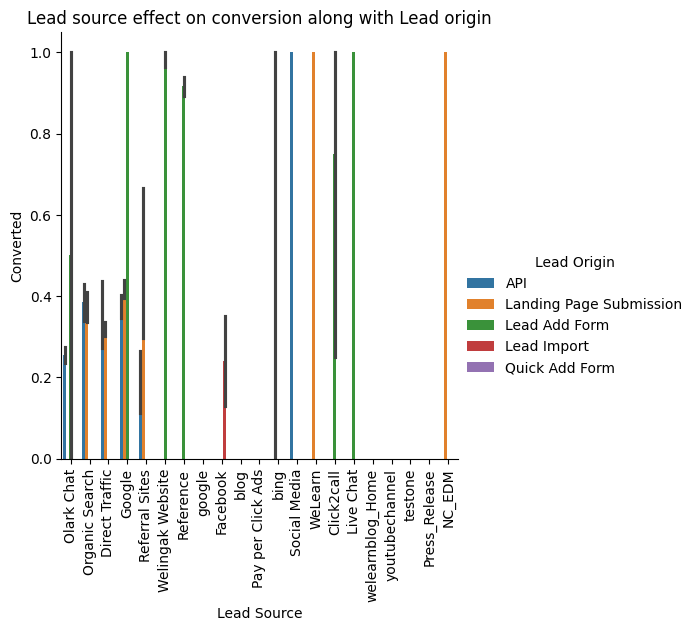

In [61]:
plt.figure(figsize=(12,12))
sns.catplot(data=data,y='Converted',x='Lead Source', kind='bar',hue="Lead Origin")
plt.xticks(rotation=90)
plt.title("Lead source effect on conversion along with Lead origin")
plt.show()

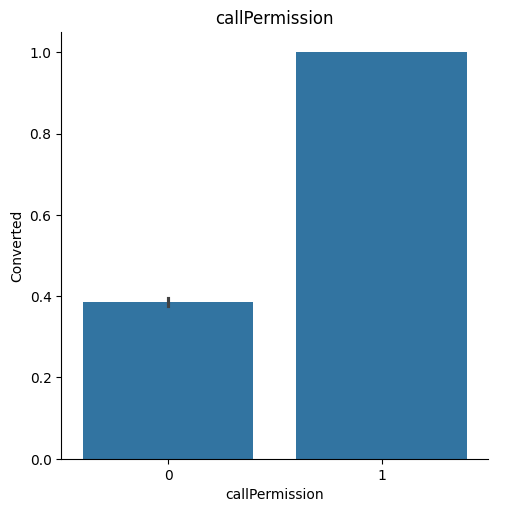

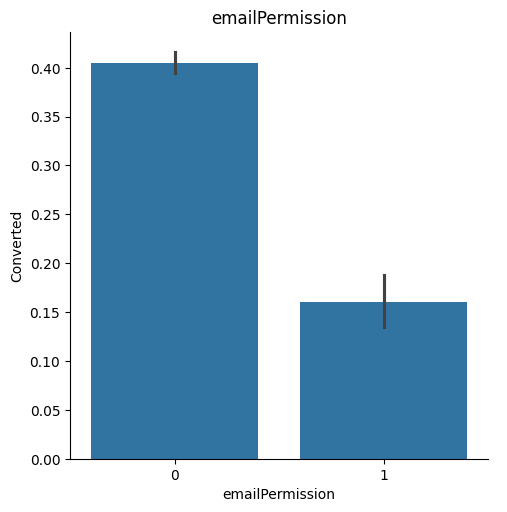

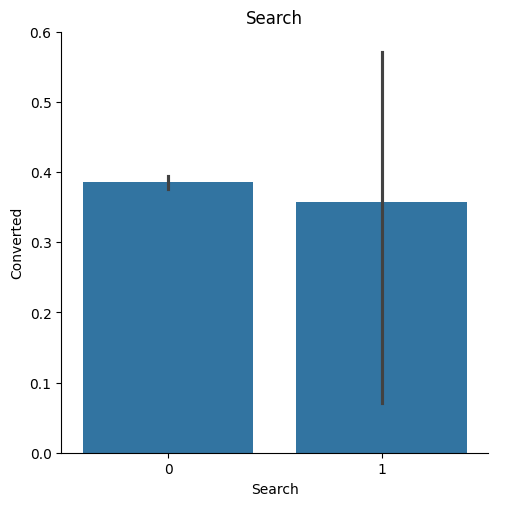

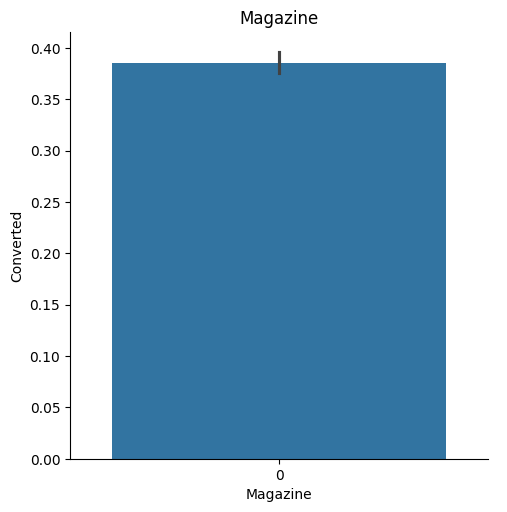

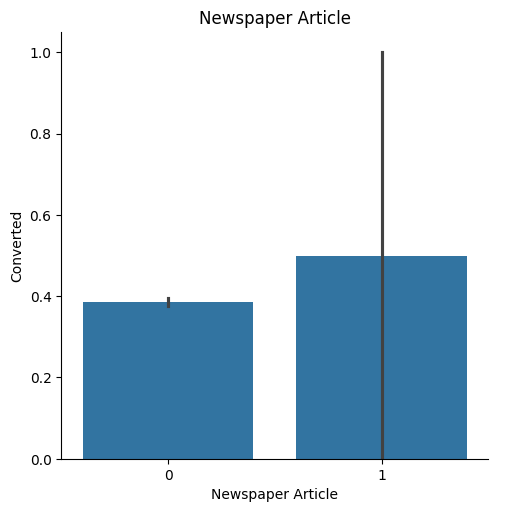

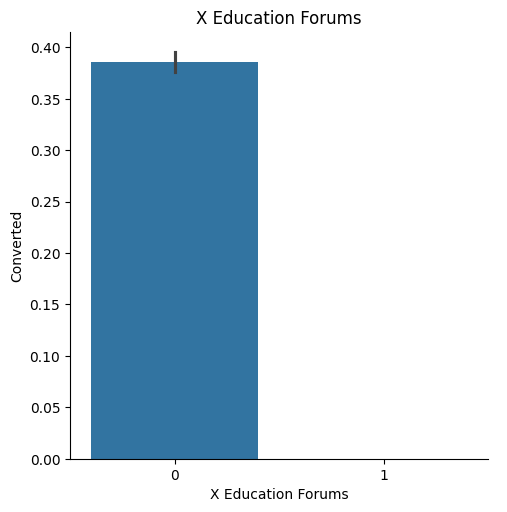

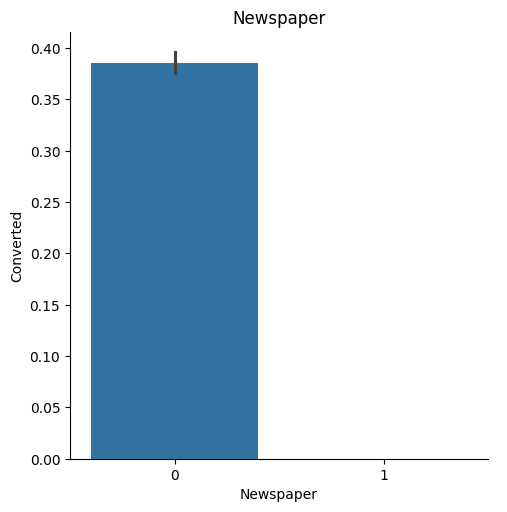

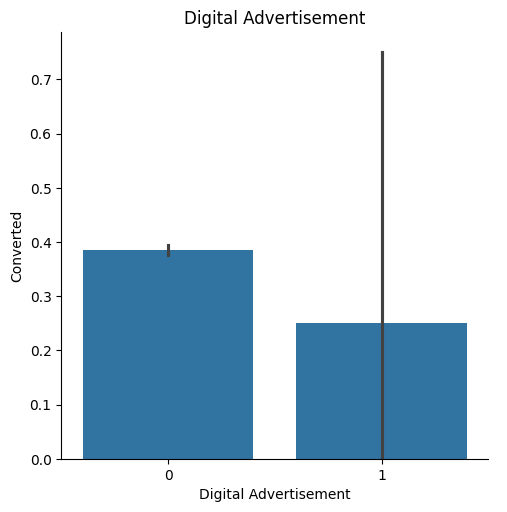

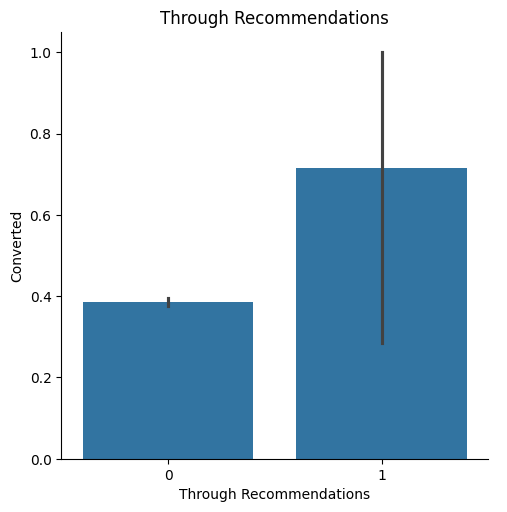

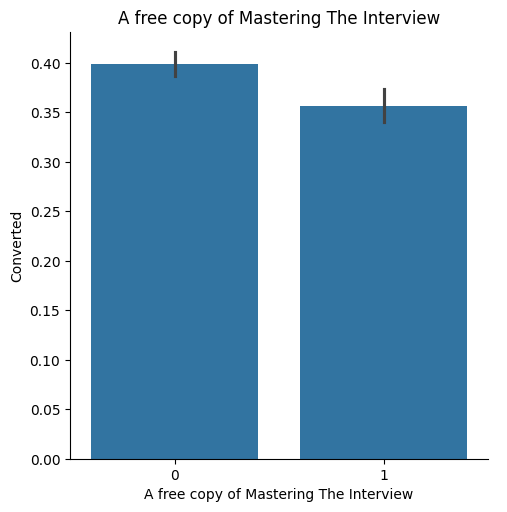

In [62]:

for col in bool_columns:
    sns.catplot(data=data,x=col,y='Converted',kind='bar')
    plt.title(col)

In [63]:
data.drop(['Newspaper','X Education Forums'],axis=1,inplace=True)

In [64]:
for x  in 'Newspaper','X Education Forums':
    bool_columns.remove(x)

In [65]:
data['channel'].replace('Select',np.nan,inplace=True)

In [66]:
for col in bool_columns:
    data[col]=data[col].astype('int')

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9204 non-null   object 
 4   emailPermission                         9240 non-null   int64  
 5   callPermission                          9240 non-null   int64  
 6   Converted                               9240 non-null   int64  
 7   TotalVisits                             9103 non-null   float64
 8   timeSpend                               9240 non-null   int64  
 9   pageViewPerVisit                        9103 non-null   float64
 10  Last Activity                           9137 non-null   obje

In [68]:
vars.append(['City','occupation','expectation','Lead Origin','Lead Source','channel','LeadQuality','Lead Profile'])

In [69]:
data['City'].replace('Select',np.nan,inplace=True)

In [70]:
data.City.value_counts(normalize=True)

City
Mumbai                         0.578352
Thane & Outskirts              0.134985
Other Cities                   0.123138
Other Cities of Maharashtra    0.082032
Other Metro Cities             0.068210
Tier II Cities                 0.013283
Name: proportion, dtype: float64

In [71]:
data.City.fillna("Mumbai",inplace=True)

In [72]:
data['Lead Profile'].replace('Select',np.nan,inplace=True)

In [73]:
data = data.dropna()

In [74]:
data['Converted']=data.Converted.astype('int')

Text(0.5, 1.0, 'Effect of asymmetrique activities on conversion')

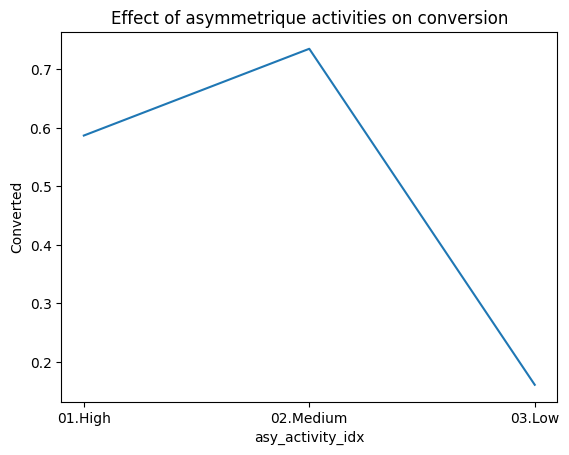

In [75]:
sns.lineplot(data.groupby('asy_activity_idx')['Converted'].mean())
plt.title('Effect of asymmetrique activities on conversion')


Conversion rate is too low for low asymmetric activity clients.

In [77]:
profileVsVisits=pd.pivot_table(data,index=["asy_prof_idx",'asy_activity_idx'],columns="TotalVisits",values='Converted',aggfunc=np.mean)

<Axes: xlabel='TotalVisits', ylabel='asy_prof_idx-asy_activity_idx'>

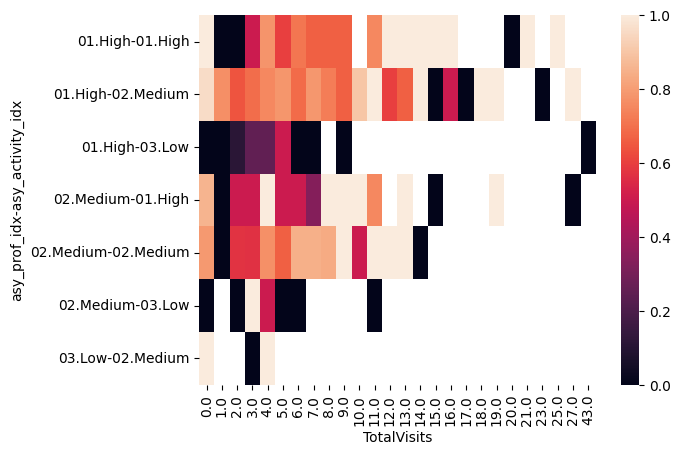

In [78]:
sns.heatmap(profileVsVisits)

It is quite randome here and we cannot draw any counclusion solely from assynchrounous activity and number of visits.
As number of visits increases the conversion tends to be more drastic. After arround visiting 10 times, there are
few windows with guarenteed conversion  but there are also few windows with no conversion at all.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Banking, Investment And Insurance'),
  Text(1, 0, 'Business Administration'),
  Text(2, 0, 'E-Business'),
  Text(3, 0, 'E-COMMERCE'),
  Text(4, 0, 'Finance Management'),
  Text(5, 0, 'Healthcare Management'),
  Text(6, 0, 'Hospitality Management'),
  Text(7, 0, 'Human Resource Management'),
  Text(8, 0, 'IT Projects Management'),
  Text(9, 0, 'International Business'),
  Text(10, 0, 'Marketing Management'),
  Text(11, 0, 'Media and Advertising'),
  Text(12, 0, 'Operations Management'),
  Text(13, 0, 'Retail Management'),
  Text(14, 0, 'Rural and Agribusiness'),
  Text(15, 0, 'Services Excellence'),
  Text(16, 0, 'Supply Chain Management'),
  Text(17, 0, 'Travel and Tourism')])

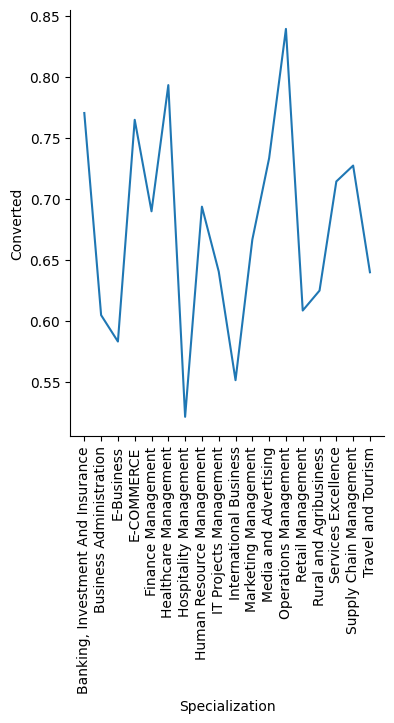

In [80]:
sns.relplot(data.groupby(["Specialization"])['Converted'].mean(), kind='line')
plt.xticks(rotation=90)


It is observed that operational management people and advertisements industry also healthcase ones are the opeple more interested is 
taking up the course.

<Axes: xlabel='channel', ylabel='Last Activity'>

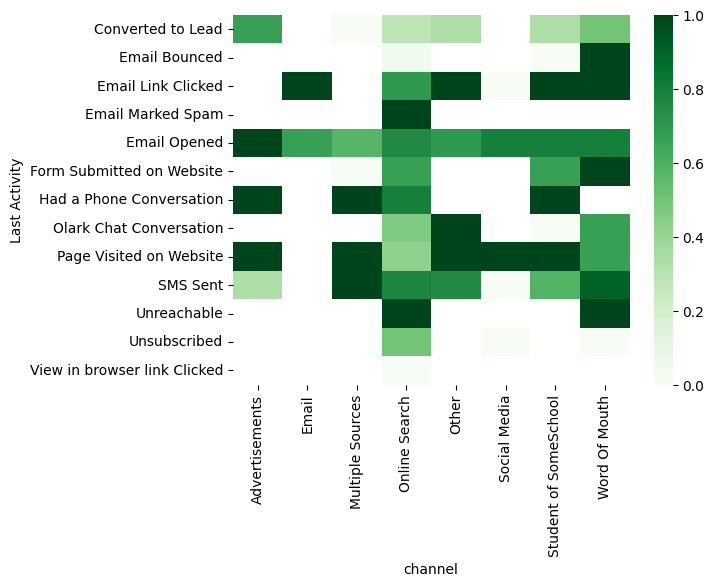

In [82]:
sns.heatmap(pd.pivot_table(data,index="Last Activity",columns='channel',values='Converted',aggfunc=np.mean),cmap="Greens")

People who have opened email froma company and who had visited website page, who landed here via online search, or word of mouth,
are the ones who are hot leads.

In [84]:
profile=pd.pivot_table(data,index=["asy_prof_idx",'asy_activity_idx'],columns="LeadQuality",values='Converted',aggfunc=np.mean)

<Axes: xlabel='LeadQuality', ylabel='asy_prof_idx-asy_activity_idx'>

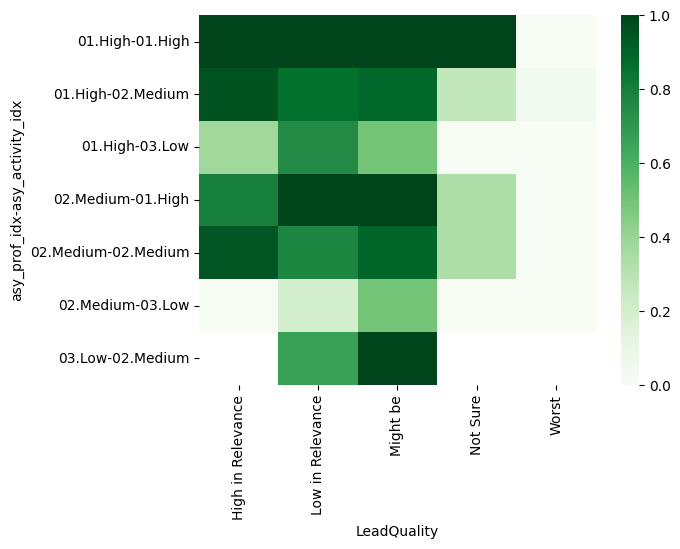

In [85]:
sns.heatmap(profile, cmap='Greens')

Text(0.5, 1.0, 'Checking profile id vs asy activity indexes iffect on Conversion')

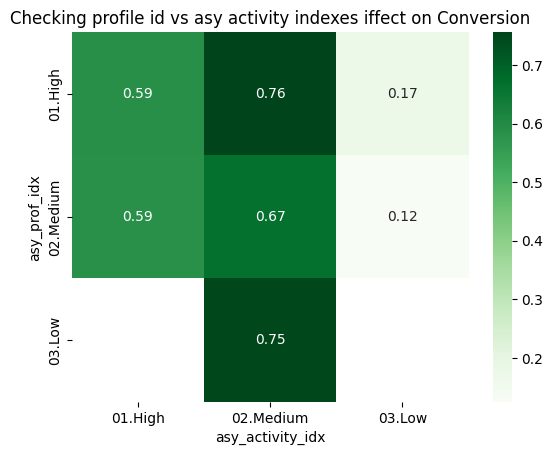

In [86]:
sns.heatmap(pd.pivot_table(data,index="asy_prof_idx",columns="asy_activity_idx",values='Converted',aggfunc=np.mean),cmap='Greens', annot=True)
plt.title("Checking profile id vs asy activity indexes iffect on Conversion")

# We get to conclusion that 
1. Lead quality is best predictor orbserved so far
2. Low assymetric profile index and high activity index tends to be hot leads while assymetric activity index itself is another great indicator
Lets check our assumptions from model itself

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1080 entries, 2 to 9239
Data columns (total 31 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             1080 non-null   object 
 1   Lead Number                             1080 non-null   int64  
 2   Lead Origin                             1080 non-null   object 
 3   Lead Source                             1080 non-null   object 
 4   emailPermission                         1080 non-null   int64  
 5   callPermission                          1080 non-null   int64  
 6   Converted                               1080 non-null   int64  
 7   TotalVisits                             1080 non-null   float64
 8   timeSpend                               1080 non-null   int64  
 9   pageViewPerVisit                        1080 non-null   float64
 10  Last Activity                           1080 non-null   object 
 

In [89]:
# get dummies
temp = data.loc[:, data.dtypes == 'object']
vars=temp.columns.to_list()
vars

['Prospect ID',
 'Lead Origin',
 'Lead Source',
 'Last Activity',
 'Country',
 'Specialization',
 'channel',
 'occupation',
 'expectation',
 'Tags',
 'LeadQuality',
 'Lead Profile',
 'City',
 'asy_activity_idx',
 'asy_prof_idx',
 'Last Notable Activity']

<Axes: >

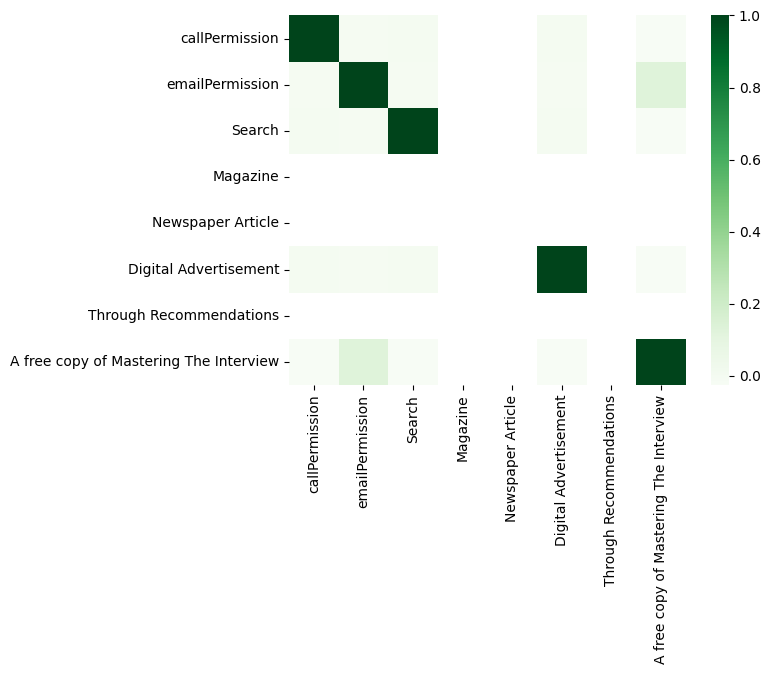

In [90]:
sns.heatmap(data[bool_columns].corr(),cmap='Greens')

In [91]:
data=data.drop('Prospect ID', axis=1)

# Get dummies and checking highly correlated predictors

In [93]:
vars.remove("Prospect ID")
vars


['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Country',
 'Specialization',
 'channel',
 'occupation',
 'expectation',
 'Tags',
 'LeadQuality',
 'Lead Profile',
 'City',
 'asy_activity_idx',
 'asy_prof_idx',
 'Last Notable Activity']

In [94]:
data1=pd.get_dummies(data[vars], drop_first=True).astype('int')

In [95]:
data=pd.concat([data,data1],axis=1)

In [96]:
data=data.drop(vars, axis=1)

<Axes: >

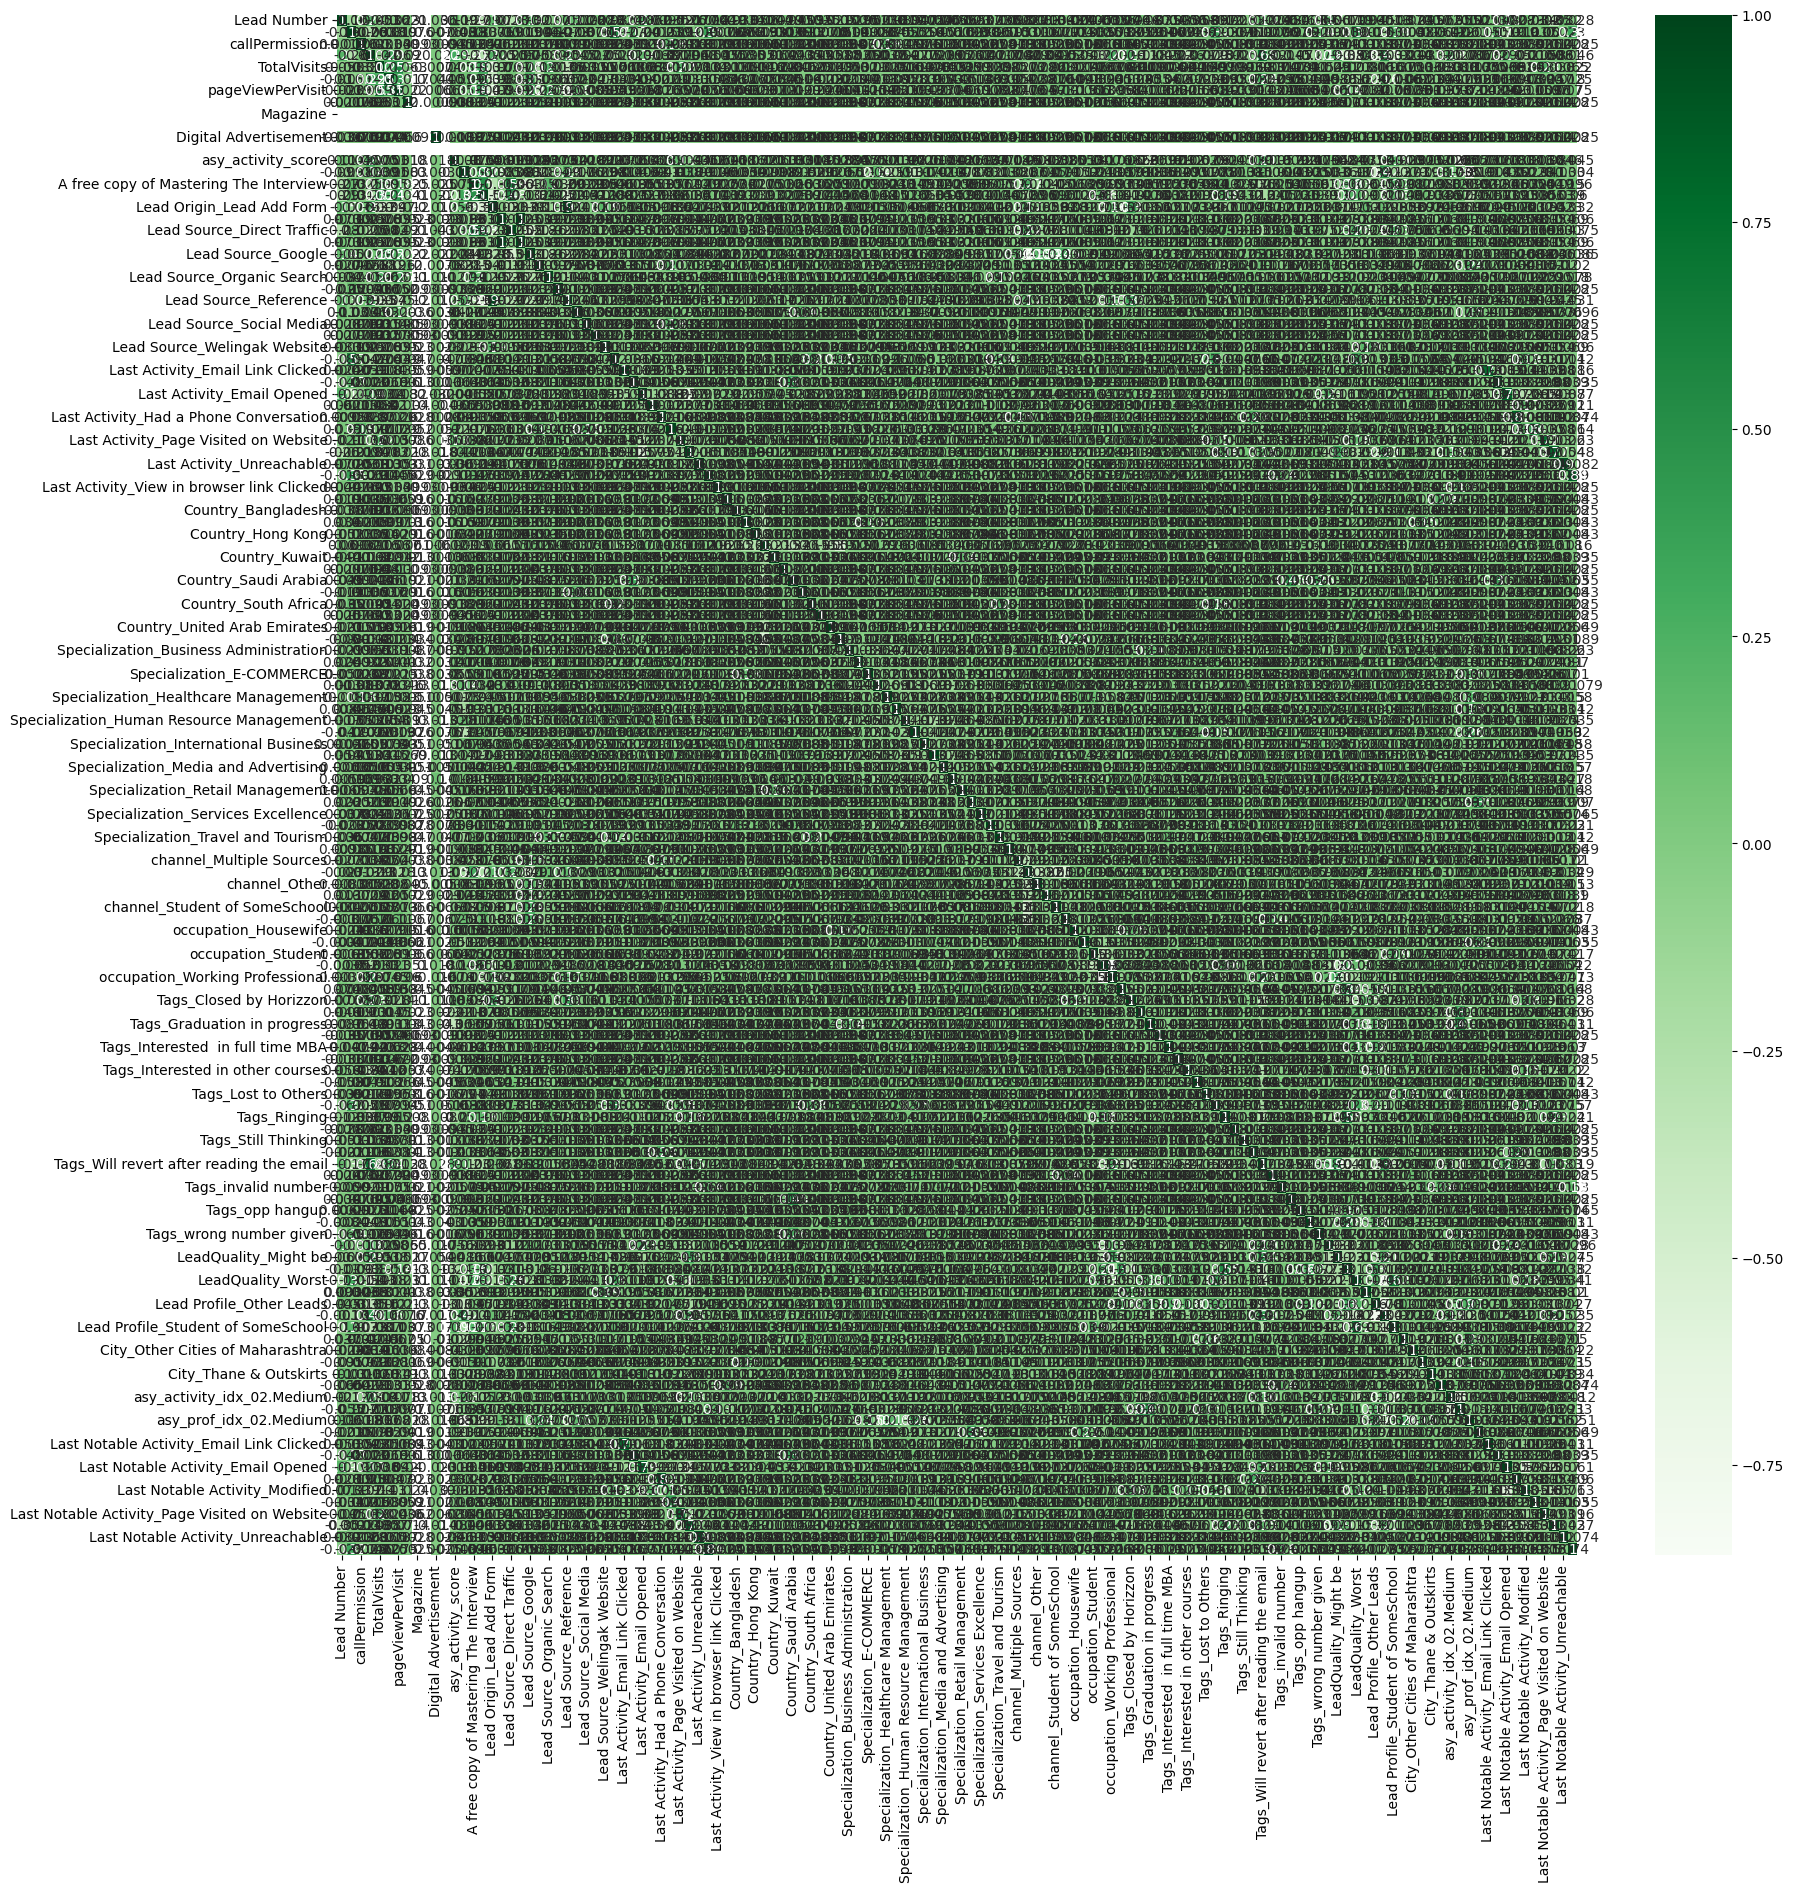

In [97]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),cmap='Greens',annot=True)

In [98]:
X=data.drop('Converted',axis=1)

In [99]:
corr_matrix=X.corr()

In [100]:
def get_correlated_features(corr_matrix):
    high_corr = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    high_corr_pairs = high_corr.stack().reset_index()

    # Filter pairs with correlation > 0.5
    high_corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
    result = high_corr_pairs[(high_corr_pairs['Correlation'] > 0.5) | (high_corr_pairs['Correlation'] < -0.5) ]
    return result

In [101]:
get_correlated_features(corr_matrix)

Feature 1  \
150                          emailPermission   
379                              TotalVisits   
1094                      asy_activity_score   
1213                          asy_prof_score   
1228  A free copy of Mastering The Interview   
1342     Lead Origin_Landing Page Submission   
1350     Lead Origin_Landing Page Submission   
1465               Lead Origin_Lead Add Form   
1574                 Lead Origin_Lead Import   
3068        Last Activity_Email Link Clicked   
3169         Last Activity_Email Marked Spam   
3182              Last Activity_Email Opened   
3269              Last Activity_Email Opened   
3465  Last Activity_Had a Phone Conversation   
3659   Last Activity_Page Visited on Website   
3754                  Last Activity_SMS Sent   
3848               Last Activity_Unreachable   
3941              Last Activity_Unsubscribed   
4394                           Country_India   
6419                   channel_Online Search   
6420                   channel_Online Search   
6853                   occupation_Unemployed   
7437                            Tags_Ringing   
7855                       LeadQuality_Worst   
7897                Lead Profile_Other Leads   
8037              asy_activity_idx_02.Medium   
8101      Last Notable Activity_Email Opened   

                                           Feature 2  Correlation  
150                      Last Activity_Email Bounced     0.565947  
379                                 pageViewPerVisit     0.553557  
1094                         asy_activity_idx_03.Low    -0.651905  
1213                          asy_prof_idx_02.Medium    -0.812751  
1228                      Lead Source_Direct Traffic     0.589534  
1342                       Lead Origin_Lead Add Form    -0.539758  
1350                           Lead Source_Reference    -0.522729  
1465                           Lead Source_Reference     0.968450  
1574                            Lead Source_Facebook     1.000000  
3068        Last Notable Activity_Email Link Clicked     0.727536  
3169         Last Notable Activity_Email Marked Spam     1.000000  
3182                          Last Activity_SMS Sent    -0.565873  
3269              Last Notable Activity_Email Opened     0.793904  
3465  Last Notable Activity_Had a Phone Conversation     0.815355  
3659   Last Notable Activity_Page Visited on Website     0.719946  
3754                  Last Notable Activity_SMS Sent     0.768494  
3848               Last Notable Activity_Unreachable     0.903689  
3941              Last Notable Activity_Unsubscribed     0.835490  
4394                           Country_United States    -0.548736  
6419                   channel_Student of SomeSchool    -0.506156  
6420                           channel_Word Of Mouth    -0.511543  
6853                 occupation_Working Professional    -0.858102  
7437                            LeadQuality_Not Sure     0.553955  
7855              Lead Profile_Student of SomeSchool     0.618744  
7897                     Lead Profile_Potential Lead    -0.777000  
8037                         asy_activity_idx_03.Low    -0.560761  
8101                  Last Notable Activity_Modified    -0.589368

In [102]:
data=data.drop(['Last Notable Activity_Email Opened','Last Notable Activity_Had a Phone Conversation','Last Notable Activity_Email Marked Spam'],axis=1)

In [103]:
data=data.drop(['occupation_Working Professional','Lead Source_Reference','Lead Source_Facebook','Last Notable Activity_Unsubscribed'
          ,'asy_prof_idx_02.Medium','Last Notable Activity_Unreachable','Last Notable Activity_Modified','Lead Profile_Student of SomeSchool',
          'Last Notable Activity_SMS Sent','Last Notable Activity_Page Visited on Website'],axis=1)

# Noting down highly correlated columns
1. Page view per visit and total visits
2. Free copy of mastering interview and page per vist and totalTime spend
3. Lead  origin- landing page msubmission with total vist and time spent and page per view.


In [105]:
y=data.Converted

## Preprocessing

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8, random_state=100)

In [109]:
X_test.shape

(216, 131)

In [110]:
X_train.shape

(864, 131)

In [111]:
y_test.shape

(216,)

In [112]:
y_train.shape

(864,)

In [113]:
from sklearn.preprocessing import MinMaxScaler

In [114]:
scaler=MinMaxScaler()
X_train[['timeSpend','TotalVisits',"pageViewPerVisit"]]=scaler.fit_transform(X_train[['timeSpend','TotalVisits',"pageViewPerVisit"]])

In [115]:
X_test[['timeSpend','TotalVisits','pageViewPerVisit']]=scaler.transform(X_test[['timeSpend','TotalVisits','pageViewPerVisit']])

In [116]:
X_test.head()

Lead Number  emailPermission  callPermission  TotalVisits  timeSpend  \
899        650851                0               0     0.046512   0.703506   
8943       581789                0               0     0.046512   0.549046   
5263       609425                0               0     0.093023   0.686640   
8669       583616                1               0     0.116279   0.008433   
8974       581538                0               0     0.186047   0.079006   

      pageViewPerVisit  Search  Magazine  Newspaper Article  \
899           0.133333       0         0                  0   
8943          0.133333       0         0                  0   
5263          0.266667       0         0                  0   
8669          0.083333       0         0                  0   
8974          0.266667       0         0                  0   

      Digital Advertisement  Through Recommendations  asy_activity_score  \
899                       0                        0                15.0   
8943                      0                        0                14.0   
5263                      0                        0                14.0   
8669                      0                        0                 8.0   
8974                      0                        0                14.0   

      asy_prof_score  A free copy of Mastering The Interview  \
899             16.0                                       0   
8943            17.0                                       1   
5263            20.0                                       0   
8669            16.0                                       1   
8974            20.0                                       1   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
899                                     0                          0   
8943                                    1                          0   
5263                                    1                          0   
8669                                    1                          0   
8974                                    1                          0   

      Lead Origin_Lead Import  Lead Source_Direct Traffic  \
899                         0                           0   
8943                        0                           1   
5263                        0                           0   
8669                        0                           1   
8974                        0                           0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  \
899                      0                   1                       0   
8943                     0                   0                       0   
5263                     0                   1                       0   
8669                     0                   0                       0   
8974                     0                   0                       0   

      Lead Source_Organic Search  Lead Source_Press_Release  \
899                            0                          0   
8943                           0                          0   
5263                           0                          0   
8669                           0                          0   
8974                           1                          0   

      Lead Source_Reference  Lead Source_Referral Sites  \
899                       0                           0   
8943                      0                           0   
5263                      0                           0   
8669                      0                           0   
8974                      0                           0   

      Lead Source_Social Media  Lead Source_WeLearn  \
899                          0                    0   
8943                         0                    0   
5263                         0                    0   
8669                         0                    0   
8974                         0                    0   

      

In [117]:
# Import 'LogisticRegression' and create a LogisticRegression object
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [118]:
from sklearn.feature_selection import RFE
?RFE

Init signature:
RFE(
    estimator,
    *,
    n_features_to_select=None,
    step=1,
    verbose=0,
    importance_getter='auto',
)
Docstring:     
Feature ranking with recursive feature elimination.

Given an external estimator that assigns weights to features (e.g., the
coefficients of a linear model), the goal of recursive feature elimination
(RFE) is to select features by recursively considering smaller and smaller
sets of features. First, the estimator is trained on the initial set of
features and the importance of each feature is obtained either through
any specific attribute or callable.
Then, the least important features are pruned from current set of features.
That procedure is recursively repeated on the pruned set until the desired
number of features to select is eventually reached.

Read more in the :ref:`User Guide <rfe>`.

Parameters
----------
estimator : ``Estimator`` instance
    A supervised learning estimator with a ``fit`` method that provides
    information about

In [119]:
rfe=RFE(logreg,n_features_to_select=30)

In [120]:
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=30)

In [121]:
pd.DataFrame(zip(X_train.columns,rfe.support_,rfe.ranking_))

0      1    2
0                                          Lead Number   True    1
1                                      emailPermission   True    1
2                                       callPermission  False   85
3                                          TotalVisits  False   53
4                                            timeSpend   True    1
5                                     pageViewPerVisit  False   65
6                                               Search  False   86
7                                             Magazine  False   95
8                                    Newspaper Article  False  100
9                                Digital Advertisement  False   84
10                             Through Recommendations  False   96
11                                  asy_activity_score   True    1
12                                      asy_prof_score   True    1
13              A free copy of Mastering The Interview   True    1
14                 Lead Origin_Landing Page Submission   True    1
15                           Lead Origin_Lead Add Form   True    1
16                             Lead Origin_Lead Import  False   41
17                          Lead Source_Direct Traffic   True    1
18                                Lead Source_Facebook  False   42
19                                  Lead Source_Google   True    1
20                              Lead Source_Olark Chat  False   14
21                          Lead Source_Organic Search  False   49
22                           Lead Source_Press_Release  False   74
23                               Lead Source_Reference   True    1
24                          Lead Source_Referral Sites  False   40
25                            Lead Source_Social Media  False  102
26                                 Lead Source_WeLearn  False   88
27                        Lead Source_Welingak Website  False   54
28                         Last Activity_Email Bounced  False    7
29                    Last Activity_Email Link Clicked  False   44
30                     Last Activity_Email Marked Spam  False   69
31                          Last Activity_Email Opened   True    1
32             Last Activity_Form Submitted on Website  False   93
33              Last Activity_Had a Phone Conversation  False   51
34               Last Activity_Olark Chat Conversation  False   17
35               Last Activity_Page Visited on Website  False   11
36                              Last Activity_SMS Sent   True    1
37                           Last Activity_Unreachable  False   29
38                          Last Activity_Unsubscribed  False   32
39          Last Activity_View in browser link Clicked  False   71
40                                     Country_Bahrain  False   90
41                                  Country_Bangladesh  False   83
42                                      Country_France  False   64
43                                   Country_Hong Kong  False   61
44                                       Country_India   True    1
45                                      Country_Kuwait  False   56
46                                 Country_Netherlands  False   89
47                                Country_Saudi Arabia  False   77
48                                   Country_Singapore  False   62
49                                Country_South Africa  False   75
50                                      Country_Sweden  False   72
51                        Country_United Arab Emirates  False   45
52                               Country_United States  False   78
53              Specialization_Business Administration  False   16
54                           Specialization_E-Business  False   47
55                           Specialization_E-COMMERCE  False   39
56                   Specialization_Finance Management  False   31
57                Specialization_Healthcare Management  False   38
58               Specialization_Hospitality Management  False   21
59            Specialization_Huma

## Model building

In [123]:
import statsmodels.api as sm

In [124]:
X_train_1=sm.add_constant(X_train)

In [125]:
model=sm.GLM(y_train,X_train_1,family=sm.families.Binomial())

In [126]:
logreg=model.fit()

In [127]:
logreg.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                                                 Results: Generalized linear model
====================================================================================================================================================================
Model:                                                 GLM                                               AIC:                                             nan       
Link Function:                                         Logit                                             BIC:                                             -3642.2975
Dependent Variable:                                    Converted                                         Log-Likelihood:                                  nan       
Date:                                                  2024-09-17 13:25                                  LL-Null:                                         -537.40   
No. Observations:                                      864                                               Deviance:                                        1381.6    
Df Model:                                              120                                               Pearson chi2:                                    6.76e+16  
Df Residuals:                                          743                                               Scale:                                           1.0000    
Method:                                                IRLS                                                                                                         
--------------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                Coef.             Std.Err.           z        P>|z|           [0.025                  0.975]        
--------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                  -11744603817848228.0000 151161288.5152  -77695843.5140 0.0000 -11744604114118910.0000 -11744603521577546.0000
Lead Number                                                   12123487469.6516       101.4905  119454373.0583 0.0000        12123487270.7339        12123487668.5694
emailPermission                                         -2163668449891586.5000  15363244.8542 -140834079.6770 0.0000  -2163668480002993.0000  -2163668419780180.0000
callPermission                                           2600082688193473.5000  73006542.9521   35614378.9729 0.0000   2600082545103278.5000   2600082831283668.5000
TotalVisits                                             -1317752640525091.7500  35720174.0706  -36890991.5702 0.0000  -1317752710535346.5000  -1317752570514837.0000
timeSpend                                                1392777346669577.5000  11499280.9101  121118647.1191 0.0000   1392777324131401.0000   1392777369207754.0000
pageViewPerVisit                                         -252034888697379.2500  25172683.2227  -10012237.7288 0.0000   -252034938034931.7500   -252034839359826.7500
Search                                                   1613569528511233.7500  69328971.1872   23274101.7338 0.0000   1613569392628947.2500   1613569664393520.2500
Magazine                                                             2740.9149         0.0001   50114708.3795 0.0000               2740.9147               2740.9150
Newspaper Article                                                  -46655.5722         0.0009  -49534890.8624 0.0000             -46655.5741             -46655.5704
Digital Advertisement                                    3891946269369008.5000  69366772.2183   56106780.5941 0.0000   3891946133412633.0000   3891946405325384.0000
Through Recommendations                                  

This is quite a bad modelk so lets get help of rfe

In [129]:
col = X_train.columns[rfe.support_]
X_train=X_train[col]
X_train_1=sm.add_constant(X_train[col])
model=sm.GLM(y_train,X_train_1,family=sm.families.Binomial())
logreg=model.fit()
logreg.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                Results: Generalized linear model
==================================================================================================
Model:                           GLM                         AIC:                       270.1432  
Link Function:                   Logit                       BIC:                       -5424.2469
Dependent Variable:              Converted                   Log-Likelihood:            -104.07   
Date:                            2024-09-17 13:25            LL-Null:                   -537.40   
No. Observations:                864                         Deviance:                  208.14    
Df Model:                        30                          Pearson chi2:              628.      
Df Residuals:                    833                         Scale:                     1.0000    
Method:                          IRLS                                                             
--------------------------------------------------------------------------------------------------
                                          Coef.    Std.Err.     z    P>|z|     [0.025     0.975]  
--------------------------------------------------------------------------------------------------
const                                     -7.0138 38189.4338 -0.0002 0.9999 -74856.9286 74842.9011
Lead Number                                0.0000     0.0000  3.5442 0.0004      0.0000     0.0000
emailPermission                           -2.7500     1.2188 -2.2562 0.0241     -5.1389    -0.3611
timeSpend                                  4.1124     0.8817  4.6640 0.0000      2.3842     5.8406
asy_activity_score                         0.7810     0.3051  2.5596 0.0105      0.1830     1.3790
asy_prof_score                            -0.2197     0.1464 -1.5006 0.1335     -0.5066     0.0672
A free copy of Mastering The Interview     0.6601     0.5679  1.1624 0.2451     -0.4529     1.7731
Lead Origin_Landing Page Submission        0.7362     0.6826  1.0785 0.2808     -0.6017     2.0740
Lead Origin_Lead Add Form                  2.9734     1.9430  1.5303 0.1259     -0.8348     6.7815
Lead Source_Direct Traffic                 0.0805     0.6512  0.1236 0.9016     -1.1959     1.3569
Lead Source_Google                        -0.1454     0.6056 -0.2402 0.8102     -1.3323     1.0415
Lead Source_Reference                     -1.1168     1.8822 -0.5933 0.5530     -4.8058     2.5723
Last Activity_Email Opened                -0.8027     0.7526 -1.0666 0.2862     -2.2779     0.6724
Last Activity_SMS Sent                     0.5895     0.5479  1.0760 0.2819     -0.4843     1.6634
Country_India                              0.2492     0.9726  0.2562 0.7978     -1.6570     2.1554
occupation_Working Professional            0.9003     0.7229  1.2453 0.2130     -0.5166     2.3172
Tags_Closed by Horizzon                   25.9713 20759.8651  0.0013 0.9990 -40662.6166 40714.5592
Tags_Interested in other courses         -24.7895 24534.0989 -0.0010 0.9992 -48110.7397 48061.1608
Tags_Ringing                              -2.8090     0.7890 -3.5604 0.0004     -4.3553    -1.2626
Tags_Will revert after reading the email   4.0988     0.6258  6.5502 0.0000      2.8723     5.3252
LeadQuality_Low in Relevance              -0.6005     0.7882 -0.7619 0.4461     -2.1452     0.9443
LeadQuality_Might be                      -0.0520     0.7368 -0.0706 0.9437     -1.4961     1.3920
LeadQuality_Not Sure                      -0.0365     0.7756 -0.0471 0.9624     -1.5567     1.4836
LeadQuality_Worst                         -4.1803     1.8035 -2.3179 0.0205     -7.7150    -0.6456
Lead Profile_Other Leads                 -22.3963 38189.4330 -0.0006 0.9995 -74872.3096 74827.5170
Lead Profile_Potential Lead              -20.9875 38189.4330 -0.0005 0.9996 -74870.9008 74828.9258
Lead Profile_Student of SomeSchool       -20.4214 38189.4331 -0.0005 0.9996 -74870.3348 74829.4919
asy_activity_idx_02.Medi

In [130]:
 #There are still so manu highly correlated columns lets drop them before checking VIFs
X_train=X_train.drop(['Tags_Closed by Horizzon','Tags_Interested in other courses',
              'Lead Profile_Other Leads','Lead Profile_Potential Lead',
             'Last Activity_SMS Sent','Lead Source_Direct Traffic'],axis=1)

In [131]:
# A function to add constant to determinant dataframe,
# create model and send it back.
def build_model(X_train):
    X_train_1=sm.add_constant(X_train)
    model=sm.GLM(y_train,X_train_1,family=sm.families.Binomial())
    logreg=model.fit()
    return logreg
model=build_model(X_train)
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Generalized linear model
===========================================================================================
Model:                        GLM                       AIC:                     364.2177  
Link Function:                Logit                     BIC:                     -5358.7418
Dependent Variable:           Converted                 Log-Likelihood:          -157.11   
Date:                         2024-09-17 13:25          LL-Null:                 -537.40   
No. Observations:             864                       Deviance:                314.22    
Df Model:                     24                        Pearson chi2:            1.57e+03  
Df Residuals:                 839                       Scale:                   1.0000    
Method:                       IRLS                                                         
-------------------------------------------------------------------------------------------
                                          Coef.   Std.Err.    z    P>|z|   [0.025   0.975] 
-------------------------------------------------------------------------------------------
const                                    -24.2534   5.7805 -4.1957 0.0000 -35.5830 -12.9239
Lead Number                                0.0000   0.0000  2.1602 0.0308   0.0000   0.0000
emailPermission                           -1.9055   1.1187 -1.7034 0.0885  -4.0981   0.2871
timeSpend                                  4.3536   0.7103  6.1294 0.0000   2.9615   5.7458
asy_activity_score                         1.1618   0.2465  4.7128 0.0000   0.6786   1.6449
asy_prof_score                            -0.0721   0.0974 -0.7408 0.4588  -0.2630   0.1187
A free copy of Mastering The Interview     0.6799   0.4064  1.6729 0.0943  -0.1166   1.4764
Lead Origin_Landing Page Submission        0.2068   0.4950  0.4177 0.6761  -0.7634   1.1769
Lead Origin_Lead Add Form                  1.1275   1.4787  0.7625 0.4458  -1.7707   4.0257
Lead Source_Google                         0.0557   0.3961  0.1407 0.8881  -0.7205   0.8320
Lead Source_Reference                      1.7719   1.4512  1.2210 0.2221  -1.0724   4.6161
Last Activity_Email Opened                -0.2470   0.4601 -0.5367 0.5914  -1.1487   0.6548
Country_India                             -0.1725   0.8991 -0.1919 0.8479  -1.9348   1.5898
occupation_Working Professional            0.3480   0.4452  0.7818 0.4343  -0.5245   1.2206
Tags_Ringing                              -2.5649   0.7532 -3.4053 0.0007  -4.0412  -1.0886
Tags_Will revert after reading the email   3.4990   0.4372  8.0034 0.0000   2.6421   4.3559
LeadQuality_Low in Relevance              -1.5876   0.4814 -3.2980 0.0010  -2.5310  -0.6441
LeadQuality_Might be                      -1.5567   0.5315 -2.9288 0.0034  -2.5984  -0.5149
LeadQuality_Not Sure                      -2.0628   0.5168 -3.9916 0.0001  -3.0757  -1.0499
LeadQuality_Worst                         -6.5643   1.6015 -4.0989 0.0000  -9.7032  -3.4254
Lead Profile_Student of SomeSchool         1.4890   1.4801  1.0060 0.3144  -1.4120   4.3901
asy_activity_idx_02.Medium                 1.9470   0.7683  2.5342 0.0113   0.4412   3.4529
asy_activity_idx_03.Low                    2.3732   1.4732  1.6109 0.1072  -0.5142   5.2606
Last Notable Activity_Email Opened        -0.7170   0.6565 -1.0922 0.2747  -2.0037   0.5697
Last Notable Activity_Modified            -1.4694   0.4905 -2.9956 0.0027  -2.4307  -0.5080
===========================================================================================

"""

In [132]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [133]:
# Creating dataframe containing column names and corresponding VIF's
def get_vif(X_train):
    vif=pd.DataFrame()
    vif['column']=X_train.columns
    vif['VIF']=[round(variance_inflation_factor(X_train.values,i),2) for i in range(X_train.shape[1])]
    return vif.sort_values(by = "VIF", ascending = False)

In [134]:
get_vif(X_train)

column     VIF
0                                Lead Number  355.52
3                         asy_activity_score  294.87
4                             asy_prof_score  131.77
11                             Country_India   25.16
7                  Lead Origin_Lead Add Form   20.75
9                      Lead Source_Reference   19.56
20                asy_activity_idx_02.Medium   13.41
22        Last Notable Activity_Email Opened    7.87
6        Lead Origin_Landing Page Submission    7.58
10                Last Activity_Email Opened    7.12
14  Tags_Will revert after reading the email    4.94
5     A free copy of Mastering The Interview    3.47
23            Last Notable Activity_Modified    3.40
2                                  timeSpend    3.19
18                         LeadQuality_Worst    3.14
21                   asy_activity_idx_03.Low    3.08
8                         Lead Source_Google    2.61
17                      LeadQuality_Not Sure    2.44
16                      LeadQuality_Might be    2.26
15              LeadQuality_Low in Relevance    2.15
19        Lead Profile_Student of SomeSchool    1.94
13                              Tags_Ringing    1.63
12           occupation_Working Professional    1.52
1                            emailPermission    1.31

In [135]:
# First removing high p valie columns asy_prof_score,
X_train=X_train.drop('Last Activity_Email Opened',axis=1)

In [136]:
build_model(X_train).summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Generalized linear model
===========================================================================================
Model:                        GLM                       AIC:                     362.5058  
Link Function:                Logit                     BIC:                     -5365.2153
Dependent Variable:           Converted                 Log-Likelihood:          -157.25   
Date:                         2024-09-17 13:25          LL-Null:                 -537.40   
No. Observations:             864                       Deviance:                314.51    
Df Model:                     23                        Pearson chi2:            1.58e+03  
Df Residuals:                 840                       Scale:                   1.0000    
Method:                       IRLS                                                         
-------------------------------------------------------------------------------------------
                                          Coef.   Std.Err.    z    P>|z|   [0.025   0.975] 
-------------------------------------------------------------------------------------------
const                                    -24.3500   5.7800 -4.2128 0.0000 -35.6787 -13.0214
Lead Number                                0.0000   0.0000  2.1445 0.0320   0.0000   0.0000
emailPermission                           -1.8338   1.1101 -1.6519 0.0985  -4.0096   0.3419
timeSpend                                  4.3269   0.7080  6.1115 0.0000   2.9393   5.7146
asy_activity_score                         1.1678   0.2460  4.7474 0.0000   0.6857   1.6499
asy_prof_score                            -0.0682   0.0969 -0.7039 0.4815  -0.2580   0.1217
A free copy of Mastering The Interview     0.6604   0.4046  1.6320 0.1027  -0.1327   1.4534
Lead Origin_Landing Page Submission        0.1883   0.4934  0.3817 0.7027  -0.7788   1.1554
Lead Origin_Lead Add Form                  0.9590   1.4419  0.6651 0.5060  -1.8671   3.7851
Lead Source_Google                         0.0593   0.3965  0.1494 0.8812  -0.7179   0.8364
Lead Source_Reference                      1.9053   1.4284  1.3339 0.1822  -0.8943   4.7048
Country_India                             -0.1853   0.8935 -0.2074 0.8357  -1.9364   1.5658
occupation_Working Professional            0.3248   0.4415  0.7358 0.4618  -0.5404   1.1901
Tags_Ringing                              -2.5694   0.7514 -3.4193 0.0006  -4.0421  -1.0966
Tags_Will revert after reading the email   3.5260   0.4350  8.1054 0.0000   2.6734   4.3786
LeadQuality_Low in Relevance              -1.6097   0.4796 -3.3566 0.0008  -2.5496  -0.6698
LeadQuality_Might be                      -1.5347   0.5294 -2.8990 0.0037  -2.5723  -0.4971
LeadQuality_Not Sure                      -2.0241   0.5113 -3.9590 0.0001  -3.0262  -1.0221
LeadQuality_Worst                         -6.5215   1.6069 -4.0585 0.0000  -9.6710  -3.3721
Lead Profile_Student of SomeSchool         1.4801   1.4833  0.9978 0.3184  -1.4272   4.3873
asy_activity_idx_02.Medium                 1.9539   0.7679  2.5445 0.0109   0.4489   3.4590
asy_activity_idx_03.Low                    2.4216   1.4683  1.6493 0.0991  -0.4562   5.2994
Last Notable Activity_Email Opened        -0.9418   0.5070 -1.8574 0.0632  -1.9355   0.0520
Last Notable Activity_Modified            -1.5431   0.4701 -3.2828 0.0010  -2.4644  -0.6218
===========================================================================================

"""

In [137]:
X_train=X_train.drop('Country_India',axis=1)

In [138]:
model=build_model(X_train)
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Generalized linear model
===========================================================================================
Model:                        GLM                       AIC:                     360.5490  
Link Function:                Logit                     BIC:                     -5371.9337
Dependent Variable:           Converted                 Log-Likelihood:          -157.27   
Date:                         2024-09-17 13:25          LL-Null:                 -537.40   
No. Observations:             864                       Deviance:                314.55    
Df Model:                     22                        Pearson chi2:            1.58e+03  
Df Residuals:                 841                       Scale:                   1.0000    
Method:                       IRLS                                                         
-------------------------------------------------------------------------------------------
                                          Coef.   Std.Err.    z    P>|z|   [0.025   0.975] 
-------------------------------------------------------------------------------------------
const                                    -24.5435   5.7078 -4.3000 0.0000 -35.7306 -13.3564
Lead Number                                0.0000   0.0000  2.1675 0.0302   0.0000   0.0000
emailPermission                           -1.8235   1.1041 -1.6515 0.0986  -3.9876   0.3406
timeSpend                                  4.3321   0.7082  6.1172 0.0000   2.9441   5.7202
asy_activity_score                         1.1660   0.2458  4.7443 0.0000   0.6843   1.6477
asy_prof_score                            -0.0691   0.0967 -0.7141 0.4751  -0.2587   0.1205
A free copy of Mastering The Interview     0.6604   0.4045  1.6325 0.1026  -0.1325   1.4532
Lead Origin_Landing Page Submission        0.1972   0.4916  0.4011 0.6883  -0.7663   1.1606
Lead Origin_Lead Add Form                  0.9626   1.4422  0.6675 0.5045  -1.8641   3.7894
Lead Source_Google                         0.0518   0.3948  0.1312 0.8956  -0.7219   0.8255
Lead Source_Reference                      1.9053   1.4287  1.3336 0.1823  -0.8949   4.7056
occupation_Working Professional            0.3260   0.4414  0.7386 0.4601  -0.5391   1.1910
Tags_Ringing                              -2.5832   0.7491 -3.4483 0.0006  -4.0514  -1.1149
Tags_Will revert after reading the email   3.5336   0.4335  8.1509 0.0000   2.6839   4.3832
LeadQuality_Low in Relevance              -1.6115   0.4795 -3.3606 0.0008  -2.5513  -0.6716
LeadQuality_Might be                      -1.5371   0.5293 -2.9039 0.0037  -2.5746  -0.4997
LeadQuality_Not Sure                      -2.0170   0.5099 -3.9556 0.0001  -3.0165  -1.0176
LeadQuality_Worst                         -6.5041   1.6008 -4.0631 0.0000  -9.6415  -3.3667
Lead Profile_Student of SomeSchool         1.4843   1.4804  1.0026 0.3160  -1.4173   4.3860
asy_activity_idx_02.Medium                 1.9518   0.7679  2.5418 0.0110   0.4468   3.4569
asy_activity_idx_03.Low                    2.4072   1.4672  1.6406 0.1009  -0.4685   5.2828
Last Notable Activity_Email Opened        -0.9502   0.5057 -1.8788 0.0603  -1.9414   0.0410
Last Notable Activity_Modified            -1.5522   0.4683 -3.3143 0.0009  -2.4701  -0.6343
===========================================================================================

"""

In [139]:
get_vif(X_train)

column     VIF
0                                Lead Number  349.73
3                         asy_activity_score  291.72
4                             asy_prof_score  130.25
7                  Lead Origin_Lead Add Form   20.61
9                      Lead Source_Reference   19.42
18                asy_activity_idx_02.Medium   13.38
6        Lead Origin_Landing Page Submission    7.52
12  Tags_Will revert after reading the email    4.75
5     A free copy of Mastering The Interview    3.46
2                                  timeSpend    3.18
16                         LeadQuality_Worst    3.08
19                   asy_activity_idx_03.Low    3.07
21            Last Notable Activity_Modified    3.03
20        Last Notable Activity_Email Opened    2.90
8                         Lead Source_Google    2.59
15                      LeadQuality_Not Sure    2.39
14                      LeadQuality_Might be    2.23
13              LeadQuality_Low in Relevance    2.14
17        Lead Profile_Student of SomeSchool    1.94
11                              Tags_Ringing    1.63
10           occupation_Working Professional    1.52
1                            emailPermission    1.29

In [140]:
X_train=X_train.drop(['Lead Source_Google','Lead Number'],axis=1)

In [141]:
model=build_model(X_train)
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Generalized linear model
==========================================================================================
Model:                       GLM                       AIC:                     361.4557  
Link Function:               Logit                     BIC:                     -5380.5502
Dependent Variable:          Converted                 Log-Likelihood:          -159.73   
Date:                        2024-09-17 13:25          LL-Null:                 -537.40   
No. Observations:            864                       Deviance:                319.46    
Df Model:                    20                        Pearson chi2:            1.97e+03  
Df Residuals:                843                       Scale:                   1.0000    
Method:                      IRLS                                                         
------------------------------------------------------------------------------------------
                                          Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
------------------------------------------------------------------------------------------
const                                    -16.7600   4.3779 -3.8283 0.0001 -25.3405 -8.1794
emailPermission                           -1.9032   1.0755 -1.7696 0.0768  -4.0113  0.2048
timeSpend                                  4.1950   0.6901  6.0789 0.0000   2.8424  5.5475
asy_activity_score                         1.1960   0.2435  4.9117 0.0000   0.7187  1.6732
asy_prof_score                            -0.0844   0.0940 -0.8985 0.3689  -0.2686  0.0997
A free copy of Mastering The Interview     0.5306   0.3471  1.5288 0.1263  -0.1496  1.2109
Lead Origin_Landing Page Submission        0.1988   0.4919  0.4041 0.6861  -0.7654  1.1629
Lead Origin_Lead Add Form                  1.0488   1.3839  0.7579 0.4485  -1.6636  3.7612
Lead Source_Reference                      1.8442   1.3893  1.3274 0.1844  -0.8788  4.5671
occupation_Working Professional            0.1952   0.4341  0.4497 0.6529  -0.6555  1.0460
Tags_Ringing                              -2.7229   0.7488 -3.6362 0.0003  -4.1906 -1.2552
Tags_Will revert after reading the email   3.4704   0.4266  8.1354 0.0000   2.6343  4.3064
LeadQuality_Low in Relevance              -1.5431   0.4723 -3.2674 0.0011  -2.4688 -0.6175
LeadQuality_Might be                      -1.6226   0.5232 -3.1012 0.0019  -2.6480 -0.5971
LeadQuality_Not Sure                      -2.0371   0.5072 -4.0167 0.0001  -3.0311 -1.0431
LeadQuality_Worst                         -6.4335   1.5850 -4.0590 0.0000  -9.5400 -3.3270
Lead Profile_Student of SomeSchool         1.2201   1.4811  0.8237 0.4101  -1.6829  4.1230
asy_activity_idx_02.Medium                 1.8684   0.7665  2.4377 0.0148   0.3662  3.3706
asy_activity_idx_03.Low                    2.4293   1.4536  1.6712 0.0947  -0.4198  5.2783
Last Notable Activity_Email Opened        -0.6718   0.4815 -1.3953 0.1629  -1.6155  0.2719
Last Notable Activity_Modified            -1.3638   0.4536 -3.0064 0.0026  -2.2529 -0.4747
==========================================================================================

"""

In [142]:
X_train=X_train.drop('Lead Origin_Landing Page Submission',axis=1)

In [143]:
model=build_model(X_train)
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Generalized linear model
==========================================================================================
Model:                       GLM                       AIC:                     359.6187  
Link Function:               Logit                     BIC:                     -5387.1488
Dependent Variable:          Converted                 Log-Likelihood:          -159.81   
Date:                        2024-09-17 13:25          LL-Null:                 -537.40   
No. Observations:            864                       Deviance:                319.62    
Df Model:                    19                        Pearson chi2:            2.01e+03  
Df Residuals:                844                       Scale:                   1.0000    
Method:                      IRLS                                                         
------------------------------------------------------------------------------------------
                                          Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
------------------------------------------------------------------------------------------
const                                    -16.9731   4.3420 -3.9091 0.0001 -25.4832 -8.4630
emailPermission                           -1.8719   1.0705 -1.7487 0.0803  -3.9700  0.2262
timeSpend                                  4.2027   0.6899  6.0914 0.0000   2.8505  5.5550
asy_activity_score                         1.1933   0.2427  4.9166 0.0000   0.7176  1.6690
asy_prof_score                            -0.0643   0.0795 -0.8085 0.4188  -0.2202  0.0916
A free copy of Mastering The Interview     0.5691   0.3336  1.7060 0.0880  -0.0847  1.2229
Lead Origin_Lead Add Form                  0.9228   1.3455  0.6859 0.4928  -1.7143  3.5599
Lead Source_Reference                      1.8256   1.3858  1.3173 0.1877  -0.8905  4.5417
occupation_Working Professional            0.2005   0.4340  0.4621 0.6440  -0.6500  1.0511
Tags_Ringing                              -2.7276   0.7507 -3.6335 0.0003  -4.1989 -1.2563
Tags_Will revert after reading the email   3.4404   0.4192  8.2075 0.0000   2.6188  4.2620
LeadQuality_Low in Relevance              -1.5197   0.4689 -3.2413 0.0012  -2.4387 -0.6008
LeadQuality_Might be                      -1.6002   0.5196 -3.0797 0.0021  -2.6186 -0.5818
LeadQuality_Not Sure                      -2.0047   0.4996 -4.0125 0.0001  -2.9839 -1.0255
LeadQuality_Worst                         -6.3913   1.5756 -4.0564 0.0000  -9.4795 -3.3032
Lead Profile_Student of SomeSchool         1.2266   1.4770  0.8305 0.4063  -1.6683  4.1215
asy_activity_idx_02.Medium                 1.8819   0.7673  2.4527 0.0142   0.3781  3.3857
asy_activity_idx_03.Low                    2.4563   1.4497  1.6944 0.0902  -0.3851  5.2976
Last Notable Activity_Email Opened        -0.6561   0.4802 -1.3664 0.1718  -1.5973  0.2850
Last Notable Activity_Modified            -1.3666   0.4539 -3.0112 0.0026  -2.2562 -0.4771
==========================================================================================

"""

In [144]:
get_vif(X_train)

column    VIF
3                             asy_prof_score  82.98
2                         asy_activity_score  74.95
5                  Lead Origin_Lead Add Form  20.07
6                      Lead Source_Reference  19.30
15                asy_activity_idx_02.Medium  10.59
9   Tags_Will revert after reading the email   4.64
1                                  timeSpend   3.10
13                         LeadQuality_Worst   3.07
18            Last Notable Activity_Modified   2.98
17        Last Notable Activity_Email Opened   2.73
12                      LeadQuality_Not Sure   2.37
11                      LeadQuality_Might be   2.22
4     A free copy of Mastering The Interview   2.17
10              LeadQuality_Low in Relevance   2.12
14        Lead Profile_Student of SomeSchool   1.93
16                   asy_activity_idx_03.Low   1.86
8                               Tags_Ringing   1.63
7            occupation_Working Professional   1.50
0                            emailPermission   1.28

In [145]:
X_train=X_train.drop('occupation_Working Professional',axis=1)

In [146]:
model=build_model(X_train)
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Generalized linear model
==========================================================================================
Model:                       GLM                       AIC:                     357.8350  
Link Function:               Logit                     BIC:                     -5393.6940
Dependent Variable:          Converted                 Log-Likelihood:          -159.92   
Date:                        2024-09-17 13:25          LL-Null:                 -537.40   
No. Observations:            864                       Deviance:                319.83    
Df Model:                    18                        Pearson chi2:            2.09e+03  
Df Residuals:                845                       Scale:                   1.0000    
Method:                      IRLS                                                         
------------------------------------------------------------------------------------------
                                          Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
------------------------------------------------------------------------------------------
const                                    -16.7534   4.3029 -3.8936 0.0001 -25.1869 -8.3200
emailPermission                           -1.8398   1.0804 -1.7029 0.0886  -3.9573  0.2777
timeSpend                                  4.2254   0.6889  6.1340 0.0000   2.8753  5.5756
asy_activity_score                         1.1856   0.2413  4.9133 0.0000   0.7127  1.6586
asy_prof_score                            -0.0689   0.0789 -0.8727 0.3828  -0.2235  0.0858
A free copy of Mastering The Interview     0.5655   0.3333  1.6966 0.0898  -0.0878  1.2189
Lead Origin_Lead Add Form                  0.9043   1.3452  0.6722 0.5014  -1.7323  3.5410
Lead Source_Reference                      1.8800   1.3812  1.3612 0.1735  -0.8270  4.5870
Tags_Ringing                              -2.7278   0.7502 -3.6360 0.0003  -4.1981 -1.2574
Tags_Will revert after reading the email   3.4723   0.4153  8.3614 0.0000   2.6584  4.2862
LeadQuality_Low in Relevance              -1.5024   0.4677 -3.2125 0.0013  -2.4191 -0.5858
LeadQuality_Might be                      -1.6039   0.5202 -3.0831 0.0020  -2.6235 -0.5843
LeadQuality_Not Sure                      -2.0275   0.4978 -4.0733 0.0000  -3.0031 -1.0519
LeadQuality_Worst                         -6.4280   1.5669 -4.1024 0.0000  -9.4990 -3.3569
Lead Profile_Student of SomeSchool         1.2391   1.4653  0.8456 0.3978  -1.6329  4.1111
asy_activity_idx_02.Medium                 1.8652   0.7648  2.4389 0.0147   0.3663  3.3641
asy_activity_idx_03.Low                    2.3957   1.4396  1.6642 0.0961  -0.4258  5.2172
Last Notable Activity_Email Opened        -0.6549   0.4799 -1.3648 0.1723  -1.5955  0.2856
Last Notable Activity_Modified            -1.3576   0.4535 -2.9937 0.0028  -2.2464 -0.4688
==========================================================================================

"""

In [147]:
get_vif(X_train)

column    VIF
3                             asy_prof_score  82.36
2                         asy_activity_score  74.37
5                  Lead Origin_Lead Add Form  20.07
6                      Lead Source_Reference  19.25
14                asy_activity_idx_02.Medium  10.58
8   Tags_Will revert after reading the email   4.64
1                                  timeSpend   3.09
12                         LeadQuality_Worst   3.06
17            Last Notable Activity_Modified   2.98
16        Last Notable Activity_Email Opened   2.73
11                      LeadQuality_Not Sure   2.37
4     A free copy of Mastering The Interview   2.17
10                      LeadQuality_Might be   2.08
9               LeadQuality_Low in Relevance   2.03
13        Lead Profile_Student of SomeSchool   1.93
15                   asy_activity_idx_03.Low   1.86
7                               Tags_Ringing   1.63
0                            emailPermission   1.28

In [148]:
X_train=X_train.drop('Lead Origin_Lead Add Form',axis=1)

In [149]:
model=build_model(X_train)
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Generalized linear model
==========================================================================================
Model:                       GLM                       AIC:                     356.3161  
Link Function:               Logit                     BIC:                     -5399.9745
Dependent Variable:          Converted                 Log-Likelihood:          -160.16   
Date:                        2024-09-17 13:25          LL-Null:                 -537.40   
No. Observations:            864                       Deviance:                320.32    
Df Model:                    17                        Pearson chi2:            2.14e+03  
Df Residuals:                846                       Scale:                   1.0000    
Method:                      IRLS                                                         
------------------------------------------------------------------------------------------
                                          Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
------------------------------------------------------------------------------------------
const                                    -16.8482   4.3004 -3.9179 0.0001 -25.2768 -8.4197
emailPermission                           -1.8486   1.0721 -1.7243 0.0847  -3.9500  0.2527
timeSpend                                  4.1464   0.6765  6.1293 0.0000   2.8205  5.4723
asy_activity_score                         1.1959   0.2410  4.9627 0.0000   0.7236  1.6681
asy_prof_score                            -0.0671   0.0788 -0.8523 0.3941  -0.2216  0.0873
A free copy of Mastering The Interview     0.5388   0.3305  1.6303 0.1030  -0.1090  1.1867
Lead Source_Reference                      2.7201   0.5741  4.7384 0.0000   1.5950  3.8452
Tags_Ringing                              -2.7107   0.7478 -3.6250 0.0003  -4.1764 -1.2451
Tags_Will revert after reading the email   3.4579   0.4136  8.3612 0.0000   2.6473  4.2685
LeadQuality_Low in Relevance              -1.5747   0.4588 -3.4322 0.0006  -2.4739 -0.6755
LeadQuality_Might be                      -1.6733   0.5133 -3.2599 0.0011  -2.6793 -0.6672
LeadQuality_Not Sure                      -2.0942   0.4912 -4.2633 0.0000  -3.0569 -1.1314
LeadQuality_Worst                         -6.4959   1.5634 -4.1550 0.0000  -9.5601 -3.4317
Lead Profile_Student of SomeSchool         1.2548   1.4630  0.8577 0.3910  -1.6126  4.1222
asy_activity_idx_02.Medium                 1.8865   0.7646  2.4672 0.0136   0.3879  3.3852
asy_activity_idx_03.Low                    2.4370   1.4368  1.6961 0.0899  -0.3791  5.2532
Last Notable Activity_Email Opened        -0.6525   0.4797 -1.3603 0.1737  -1.5927  0.2876
Last Notable Activity_Modified            -1.3418   0.4524 -2.9657 0.0030  -2.2285 -0.4550
==========================================================================================

"""

In [150]:
get_vif(X_train)

column    VIF
3                             asy_prof_score  82.36
2                         asy_activity_score  74.07
13                asy_activity_idx_02.Medium  10.56
7   Tags_Will revert after reading the email   4.64
11                         LeadQuality_Worst   3.03
1                                  timeSpend   3.03
16            Last Notable Activity_Modified   2.97
15        Last Notable Activity_Email Opened   2.72
10                      LeadQuality_Not Sure   2.34
4     A free copy of Mastering The Interview   2.17
9                       LeadQuality_Might be   2.05
8               LeadQuality_Low in Relevance   1.99
12        Lead Profile_Student of SomeSchool   1.93
14                   asy_activity_idx_03.Low   1.85
5                      Lead Source_Reference   1.65
6                               Tags_Ringing   1.63
0                            emailPermission   1.28

In [151]:
X_train=X_train.drop('asy_prof_score',axis=1)

In [152]:
model=build_model(X_train)
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Generalized linear model
===========================================================================================
Model:                        GLM                       AIC:                     355.0472  
Link Function:                Logit                     BIC:                     -5406.0050
Dependent Variable:           Converted                 Log-Likelihood:          -160.52   
Date:                         2024-09-17 13:25          LL-Null:                 -537.40   
No. Observations:             864                       Deviance:                321.05    
Df Model:                     16                        Pearson chi2:            1.95e+03  
Df Residuals:                 847                       Scale:                   1.0000    
Method:                       IRLS                                                         
-------------------------------------------------------------------------------------------
                                          Coef.   Std.Err.    z    P>|z|   [0.025   0.975] 
-------------------------------------------------------------------------------------------
const                                    -18.4449   3.8885 -4.7434 0.0000 -26.0662 -10.8235
emailPermission                           -1.8436   1.0616 -1.7367 0.0824  -3.9243   0.2370
timeSpend                                  4.0810   0.6700  6.0910 0.0000   2.7678   5.3942
asy_activity_score                         1.2230   0.2390  5.1183 0.0000   0.7547   1.6914
A free copy of Mastering The Interview     0.5028   0.3273  1.5365 0.1244  -0.1386   1.1443
Lead Source_Reference                      2.6604   0.5707  4.6616 0.0000   1.5418   3.7789
Tags_Ringing                              -2.7961   0.7458 -3.7492 0.0002  -4.2578  -1.3344
Tags_Will revert after reading the email   3.4071   0.4076  8.3583 0.0000   2.6082   4.2061
LeadQuality_Low in Relevance              -1.5181   0.4520 -3.3591 0.0008  -2.4040  -0.6323
LeadQuality_Might be                      -1.5993   0.5035 -3.1764 0.0015  -2.5861  -0.6125
LeadQuality_Not Sure                      -1.9921   0.4731 -4.2108 0.0000  -2.9193  -1.0648
LeadQuality_Worst                         -6.4547   1.5558 -4.1488 0.0000  -9.5040  -3.4054
Lead Profile_Student of SomeSchool         1.2524   1.4531  0.8619 0.3887  -1.5955   4.1003
asy_activity_idx_02.Medium                 1.8714   0.7629  2.4529 0.0142   0.3761   3.3667
asy_activity_idx_03.Low                    2.5377   1.4268  1.7785 0.0753  -0.2589   5.3342
Last Notable Activity_Email Opened        -0.6036   0.4726 -1.2773 0.2015  -1.5298   0.3226
Last Notable Activity_Modified            -1.3221   0.4490 -2.9446 0.0032  -2.2021  -0.4421
===========================================================================================

"""

In [153]:
get_vif(X_train)

column    VIF
2                         asy_activity_score  21.01
12                asy_activity_idx_02.Medium   9.06
6   Tags_Will revert after reading the email   4.62
10                         LeadQuality_Worst   3.03
1                                  timeSpend   2.98
15            Last Notable Activity_Modified   2.97
14        Last Notable Activity_Email Opened   2.72
9                       LeadQuality_Not Sure   2.34
3     A free copy of Mastering The Interview   2.10
8                       LeadQuality_Might be   2.05
7               LeadQuality_Low in Relevance   1.99
11        Lead Profile_Student of SomeSchool   1.93
5                               Tags_Ringing   1.61
4                      Lead Source_Reference   1.58
13                   asy_activity_idx_03.Low   1.43
0                            emailPermission   1.28

In [154]:
X_train=X_train.drop('Lead Profile_Student of SomeSchool',axis=1)

In [155]:
model=build_model(X_train)
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Generalized linear model
===========================================================================================
Model:                        GLM                       AIC:                     353.8844  
Link Function:                Logit                     BIC:                     -5411.9293
Dependent Variable:           Converted                 Log-Likelihood:          -160.94   
Date:                         2024-09-17 13:25          LL-Null:                 -537.40   
No. Observations:             864                       Deviance:                321.88    
Df Model:                     15                        Pearson chi2:            1.98e+03  
Df Residuals:                 848                       Scale:                   1.0000    
Method:                       IRLS                                                         
-------------------------------------------------------------------------------------------
                                          Coef.   Std.Err.    z    P>|z|   [0.025   0.975] 
-------------------------------------------------------------------------------------------
const                                    -18.2618   3.8894 -4.6953 0.0000 -25.8848 -10.6388
emailPermission                           -1.8684   1.0470 -1.7845 0.0743  -3.9205   0.1838
timeSpend                                  4.0703   0.6694  6.0801 0.0000   2.7582   5.3823
asy_activity_score                         1.2115   0.2388  5.0739 0.0000   0.7435   1.6795
A free copy of Mastering The Interview     0.5126   0.3270  1.5675 0.1170  -0.1283   1.1534
Lead Source_Reference                      2.6909   0.5702  4.7193 0.0000   1.5734   3.8085
Tags_Ringing                              -2.8007   0.7456 -3.7563 0.0002  -4.2620  -1.3394
Tags_Will revert after reading the email   3.3785   0.4062  8.3181 0.0000   2.5825   4.1746
LeadQuality_Low in Relevance              -1.5024   0.4510 -3.3311 0.0009  -2.3864  -0.6184
LeadQuality_Might be                      -1.5661   0.5033 -3.1119 0.0019  -2.5525  -0.5797
LeadQuality_Not Sure                      -1.9949   0.4725 -4.2222 0.0000  -2.9209  -1.0688
LeadQuality_Worst                         -5.4733   0.8998 -6.0831 0.0000  -7.2368  -3.7098
asy_activity_idx_02.Medium                 1.8489   0.7634  2.4219 0.0154   0.3526   3.3451
asy_activity_idx_03.Low                    2.4716   1.4265  1.7327 0.0832  -0.3242   5.2674
Last Notable Activity_Email Opened        -0.5685   0.4723 -1.2037 0.2287  -1.4943   0.3572
Last Notable Activity_Modified            -1.3329   0.4480 -2.9750 0.0029  -2.2110  -0.4548
===========================================================================================

"""

In [156]:
get_vif(X_train)

column    VIF
2                         asy_activity_score  20.66
11                asy_activity_idx_02.Medium   8.81
6   Tags_Will revert after reading the email   4.59
1                                  timeSpend   2.98
14            Last Notable Activity_Modified   2.96
13        Last Notable Activity_Email Opened   2.72
9                       LeadQuality_Not Sure   2.34
10                         LeadQuality_Worst   2.32
3     A free copy of Mastering The Interview   2.08
8                       LeadQuality_Might be   2.05
7               LeadQuality_Low in Relevance   1.99
5                               Tags_Ringing   1.61
4                      Lead Source_Reference   1.58
12                   asy_activity_idx_03.Low   1.36
0                            emailPermission   1.28

In [157]:
X_train=X_train.drop('Last Notable Activity_Email Opened',axis=1)

In [158]:
model=build_model(X_train)
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Generalized linear model
===========================================================================================
Model:                        GLM                       AIC:                     353.3657  
Link Function:                Logit                     BIC:                     -5417.2096
Dependent Variable:           Converted                 Log-Likelihood:          -161.68   
Date:                         2024-09-17 13:25          LL-Null:                 -537.40   
No. Observations:             864                       Deviance:                323.37    
Df Model:                     14                        Pearson chi2:            1.95e+03  
Df Residuals:                 849                       Scale:                   1.0000    
Method:                       IRLS                                                         
-------------------------------------------------------------------------------------------
                                          Coef.   Std.Err.    z    P>|z|   [0.025   0.975] 
-------------------------------------------------------------------------------------------
const                                    -18.8222   3.8630 -4.8724 0.0000 -26.3935 -11.2509
emailPermission                           -1.7350   1.0328 -1.6798 0.0930  -3.7593   0.2893
timeSpend                                  4.0372   0.6684  6.0399 0.0000   2.7271   5.3473
asy_activity_score                         1.2245   0.2384  5.1365 0.0000   0.7572   1.6917
A free copy of Mastering The Interview     0.5234   0.3267  1.6024 0.1091  -0.1168   1.1637
Lead Source_Reference                      2.6604   0.5693  4.6729 0.0000   1.5446   3.7763
Tags_Ringing                              -2.5672   0.7124 -3.6036 0.0003  -3.9635  -1.1709
Tags_Will revert after reading the email   3.3454   0.4015  8.3328 0.0000   2.5586   4.1323
LeadQuality_Low in Relevance              -1.5441   0.4486 -3.4418 0.0006  -2.4233  -0.6648
LeadQuality_Might be                      -1.4903   0.4953 -3.0087 0.0026  -2.4611  -0.5195
LeadQuality_Not Sure                      -1.9500   0.4687 -4.1601 0.0000  -2.8687  -1.0313
LeadQuality_Worst                         -5.5030   0.8942 -6.1544 0.0000  -7.2555  -3.7505
asy_activity_idx_02.Medium                 1.8548   0.7565  2.4519 0.0142   0.3721   3.3375
asy_activity_idx_03.Low                    2.5403   1.4201  1.7888 0.0736  -0.2431   5.3237
Last Notable Activity_Modified            -0.9657   0.3200 -3.0180 0.0025  -1.5929  -0.3386
===========================================================================================

"""

In [159]:
get_vif(X_train)

column    VIF
2                         asy_activity_score  18.79
11                asy_activity_idx_02.Medium   8.73
6   Tags_Will revert after reading the email   4.59
1                                  timeSpend   2.98
9                       LeadQuality_Not Sure   2.34
10                         LeadQuality_Worst   2.31
3     A free copy of Mastering The Interview   2.08
8                       LeadQuality_Might be   2.02
7               LeadQuality_Low in Relevance   1.97
13            Last Notable Activity_Modified   1.92
4                      Lead Source_Reference   1.57
5                               Tags_Ringing   1.57
12                   asy_activity_idx_03.Low   1.34
0                            emailPermission   1.24

In [160]:
X_train=X_train.drop('A free copy of Mastering The Interview',axis=1)

In [161]:
model=build_model(X_train)
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Generalized linear model
===========================================================================================
Model:                        GLM                       AIC:                     354.0058  
Link Function:                Logit                     BIC:                     -5421.3311
Dependent Variable:           Converted                 Log-Likelihood:          -163.00   
Date:                         2024-09-17 13:25          LL-Null:                 -537.40   
No. Observations:             864                       Deviance:                326.01    
Df Model:                     13                        Pearson chi2:            2.07e+03  
Df Residuals:                 850                       Scale:                   1.0000    
Method:                       IRLS                                                         
-------------------------------------------------------------------------------------------
                                          Coef.   Std.Err.    z    P>|z|   [0.025   0.975] 
-------------------------------------------------------------------------------------------
const                                    -18.1024   3.8177 -4.7417 0.0000 -25.5849 -10.6199
emailPermission                           -1.6500   1.0088 -1.6355 0.1019  -3.6273   0.3273
timeSpend                                  4.0379   0.6655  6.0673 0.0000   2.7335   5.3423
asy_activity_score                         1.1983   0.2371  5.0549 0.0000   0.7337   1.6630
Lead Source_Reference                      2.4524   0.5469  4.4841 0.0000   1.3804   3.5243
Tags_Ringing                              -2.5174   0.7099 -3.5461 0.0004  -3.9087  -1.1260
Tags_Will revert after reading the email   3.2473   0.3921  8.2828 0.0000   2.4789   4.0157
LeadQuality_Low in Relevance              -1.5496   0.4441 -3.4891 0.0005  -2.4201  -0.6791
LeadQuality_Might be                      -1.4623   0.4921 -2.9715 0.0030  -2.4269  -0.4978
LeadQuality_Not Sure                      -1.9147   0.4659 -4.1096 0.0000  -2.8279  -1.0015
LeadQuality_Worst                         -5.3212   0.8787 -6.0554 0.0000  -7.0434  -3.5989
asy_activity_idx_02.Medium                 1.7519   0.7611  2.3018 0.0213   0.2601   3.2436
asy_activity_idx_03.Low                    2.5480   1.4180  1.7969 0.0723  -0.2312   5.3272
Last Notable Activity_Modified            -0.9987   0.3190 -3.1305 0.0017  -1.6240  -0.3734
===========================================================================================

"""

In [162]:
get_vif(X_train)

column    VIF
2                         asy_activity_score  17.85
10                asy_activity_idx_02.Medium   8.72
5   Tags_Will revert after reading the email   4.53
1                                  timeSpend   2.96
8                       LeadQuality_Not Sure   2.33
9                          LeadQuality_Worst   2.26
7                       LeadQuality_Might be   2.02
6               LeadQuality_Low in Relevance   1.97
12            Last Notable Activity_Modified   1.90
4                               Tags_Ringing   1.57
3                      Lead Source_Reference   1.51
11                   asy_activity_idx_03.Low   1.33
0                            emailPermission   1.24

# Model Evaluation
Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.

In [164]:
from sklearn  import metrics

In [165]:
y_train_pred=model.predict(sm.add_constant(X_train))

In [166]:
y_predictions=pd.DataFrame({'Converted':y_train,"Conversion Probability":y_train_pred})

In [167]:
y_predictions['prediction']=y_predictions["Conversion Probability"].map(lambda x: 1 if x>0.5 else 0)

In [168]:
y_predictions

Converted  Conversion Probability  prediction
1864          0                0.691320           1
6545          0                0.000138           0
4252          1                0.910054           1
1254          1                0.983295           1
2784          1                0.993951           1
9132          0                0.069519           0
8846          0                0.074912           0
9151          0                0.006925           0
3175          1                0.597363           1
7897          1                0.963454           1
7373          0                0.007437           0
8983          0                0.728421           1
1927          1                0.917659           1
1390          1                0.994784           1
1080          0                0.136138           0
1566          1                0.993820           1
1845          1                0.996777           1
7415          0                0.000058           0
8794          0                0.013221           0
4216          1                0.821825           1
2574          1                0.998659           1
446           1                0.992334           1
734           1                0.945599           1
70            0                0.101203           0
8443          1                0.968005           1
1892          1                0.775810           1
8986          1                0.998201           1
7674          1                0.989813           1
8188          0                0.000509           0
2281          1                0.949402           1
3716          1                0.983325           1
2605          1                0.998714           1
8399          1                0.975843           1
3136          0                0.190022           0
8906          1                0.800414           1
1550          1                0.821825           1
1014          0                0.804768           1
1432          1                0.831878           1
1488          1                0.985089           1
7740          0                0.008620           0
9062          1                0.996697           1
611           1                0.757292           1
3384          1                0.995663           1
8890          0                0.018175           0
1662          0                0.037633           0
9223          0                0.001072           0
8110          1                0.953189           1
9043          1                0.927335           1
1479          1                0.998576           1
7635          0                0.003247           0
1714          1                0.996100           1
8802          0                0.001178           0
2043          1                0.999528           1
1051          1                0.997290           1
661           1                0.991923           1
1572          1                0.997163           1
1207          0                0.027847           0
2411          1                0.965189           1
8062          0                0.975034           1
9232          0                0.302911           0
2103          1                0.980082           1
1788          1                0.998332           1
9108          0                0.381310           0
9234          1                0.830472           1
993           0                0.311528           0
3109          0                0.002027           0
9115          1                0.980780           1
1542          1                0.996630           1
8730          1                0.942824           1
9051          0                0.285152           0
1436          1                0.994230           1
4777          1                0.955992           1
3825          0                0.994103           1
7963          1                0.996758           1
8112          1                0.990656           1
7771          0                0.003045           0
10

In [169]:
confusion = metrics.confusion_matrix(y_predictions.Converted, y_predictions.prediction )
print(confusion)

[[235  36]
 [ 22 571]]


In [170]:
accuracy=metrics.accuracy_score(y_predictions.Converted,y_predictions.prediction)
accuracy

0.9328703703703703

In [171]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [172]:
#sensitivity
TP/(TP+FP)

0.9406919275123559

In [173]:
# specificity
TN/(TN+FN)

0.914396887159533

ROC-AUC (Receiver Operating Characteristic - Area Under the Curve): Measures the ability of the model to distinguish between classes (converted vs. non-converted).
AUC ranges from 0 to 1, where 1 indicates perfect classification and 0.5 indicates random guessing.

Finding the Optimal Cutoff
Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, 
you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [176]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

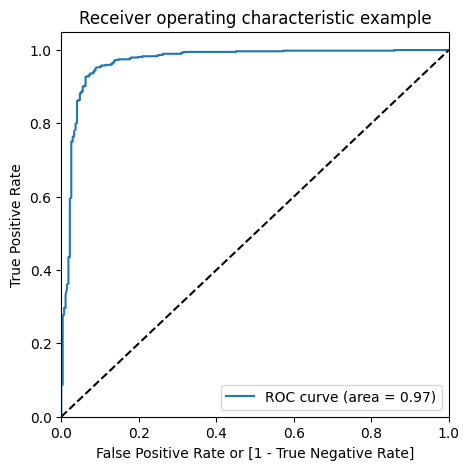

In [177]:
draw_roc(y_predictions.Converted, y_predictions["Conversion Probability"])


 Area under the curve is 0.97 which is very goodm

In [179]:
num=[float(x)/10 for x in range(10)]
for i in num:
    y_predictions[i]=y_predictions["Conversion Probability"].map(lambda x: 1 if x>i else 0 )
y_predictions

Converted  Conversion Probability  prediction  0.0  0.1  0.2  0.3  0.4  \
1864          0                0.691320           1    1    1    1    1    1   
6545          0                0.000138           0    1    0    0    0    0   
4252          1                0.910054           1    1    1    1    1    1   
1254          1                0.983295           1    1    1    1    1    1   
2784          1                0.993951           1    1    1    1    1    1   
9132          0                0.069519           0    1    0    0    0    0   
8846          0                0.074912           0    1    0    0    0    0   
9151          0                0.006925           0    1    0    0    0    0   
3175          1                0.597363           1    1    1    1    1    1   
7897          1                0.963454           1    1    1    1    1    1   
7373          0                0.007437           0    1    0    0    0    0   
8983          0                0.728421           1    1    1    1    1    1   
1927          1                0.917659           1    1    1    1    1    1   
1390          1                0.994784           1    1    1    1    1    1   
1080          0                0.136138           0    1    1    0    0    0   
1566          1                0.993820           1    1    1    1    1    1   
1845          1                0.996777           1    1    1    1    1    1   
7415          0                0.000058           0    1    0    0    0    0   
8794          0                0.013221           0    1    0    0    0    0   
4216          1                0.821825           1    1    1    1    1    1   
2574          1                0.998659           1    1    1    1    1    1   
446           1                0.992334           1    1    1    1    1    1   
734           1                0.945599           1    1    1    1    1    1   
70            0                0.101203           0    1    1    0    0    0   
8443          1                0.968005           1    1    1    1    1    1   
1892          1                0.775810           1    1    1    1    1    1   
8986          1                0.998201           1    1    1    1    1    1   
7674          1                0.989813           1    1    1    1    1    1   
8188          0                0.000509           0    1    0    0    0    0   
2281          1                0.949402           1    1    1    1    1    1   
3716          1                0.983325           1    1    1    1    1    1   
2605          1                0.998714           1    1    1    1    1    1   
8399          1                0.975843           1    1    1    1    1    1   
3136          0                0.190022           0    1    1    0    0    0   
8906          1                0.800414           1    1    1    1    1    1   
1550          1                0.821825           1    1    1    1    1    1   
1014          0                0.804768           1    1    1    1    1    1   
1432          1                0.831878           1    1    1    1    1    1   
1488          1                0.985089           1    1    1    1    1    1   
7740          0                0.008620           0    1    0    0    0    0   
9062          1                0.996697           1    1    1    1    1    1   
611           1                0.757292           1    1    1    1    1    1   
3384          1                0.995663           1    1    1    1    1    1   
8890          0                0.018175           0    1    0    0    0    0   
1662          0                0.037633           0    1    0    0    0    0   
9223          0                0.001072           0    1    0    0    0    0   
8110          1                0.953189           1    1    1    1    1    1   
9043          1                0.927335           1    1    1    1    1    1   
1479          1                0.998576           1    1    1    1    1    1   
7635  

In [180]:
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix


In [182]:
for i in num:
    cm1 = metrics.confusion_matrix(y_predictions.Converted, y_predictions[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

probability  accuracy  sensitivity  specificity
0.0          0.0  0.686343     1.000000     0.000000
0.1          0.1  0.884259     0.994941     0.642066
0.2          0.2  0.910880     0.989882     0.738007
0.3          0.3  0.922454     0.983137     0.789668
0.4          0.4  0.935185     0.973019     0.852399
0.5          0.5  0.932870     0.962901     0.867159
0.6          0.6  0.936343     0.947723     0.911439
0.7          0.7  0.930556     0.930860     0.929889
0.8          0.8  0.907407     0.890388     0.944649
0.9          0.9  0.857639     0.811130     0.959410

<Figure size 1200x1200 with 0 Axes>

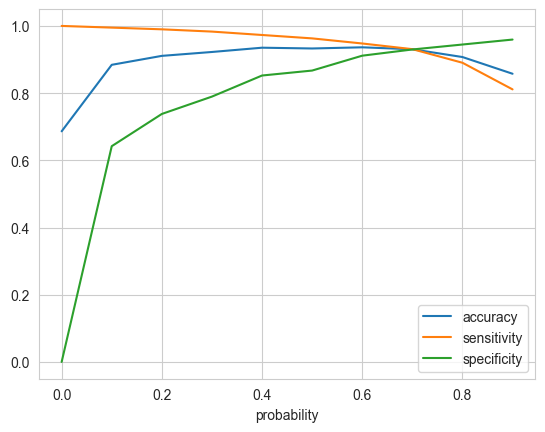

In [183]:
# Let's plot it as well
sns.set_style('whitegrid')
fig=plt.figure(figsize=(12,12))
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

In [184]:
fpr, tpr, thresholds = metrics.roc_curve( y_predictions.Converted, 
                                         y_predictions['Conversion Probability'], drop_intermediate = False )

Thresholds are around 0.78

In [186]:
y_predictions['final_prediction']=y_predictions["Conversion Probability"].map(lambda x: 1 if x > 0.78 else 0)

In [187]:
y_predictions.final_prediction

1864    0
6545    0
4252    1
1254    1
2784    1
9132    0
8846    0
9151    0
3175    0
7897    1
7373    0
8983    0
1927    1
1390    1
1080    0
1566    1
1845    1
7415    0
8794    0
4216    1
2574    1
446     1
734     1
70      0
8443    1
1892    0
8986    1
7674    1
8188    0
2281    1
3716    1
2605    1
8399    1
3136    0
8906    1
1550    1
1014    1
1432    1
1488    1
7740    0
9062    1
611     0
3384    1
8890    0
1662    0
9223    0
8110    1
9043    1
1479    1
7635    0
1714    1
8802    0
2043    1
1051    1
661     1
1572    1
1207    0
2411    1
8062    1
9232    0
2103    1
1788    1
9108    0
9234    1
993     0
3109    0
9115    1
1542    1
8730    1
9051    0
1436    1
4777    1
3825    1
7963    1
8112    1
7771    0
1026    1
3612    0
9107    1
2967    1
7187    1
1180    0
709     1
679     1
2562    1
7627    1
37      1
7927    1
1592    0
2785    1
1433    0
1540    1
3287    1
997     1
1561    1
1901    0
1556    0
8987    1
1350    1
7385    1


Accuracy= (TP+TN)/(TP+TN+FP+FN)


In [189]:
metrics.accuracy_score(y_true=y_predictions['Converted'],y_pred=y_predictions.final_prediction)

0.9131944444444444

In [190]:
confusion=metrics.confusion_matrix(y_true=y_predictions['Converted'],y_pred=y_predictions.final_prediction)
confusion

array([[254,  17],
       [ 58, 535]])

The confusion matrix provides a breakdown of the predicted vs actual outcomes:

In [192]:
TP=confusion[1][1]
TN=confusion[0][0]
FP=confusion[0][1]
FN=confusion[1][0]

In [193]:
# sensitivity
sensitivity=TP/(TP+FP)
sensitivity

0.9692028985507246

In [194]:
# specificity
specificity=TN/(TN+FP)
specificity

0.9372693726937269

In [195]:
#Recall
recall=TP/(TP+FN)
recall

0.9021922428330523

In [196]:
#F1 score
f1=(sensitivity*recall)/(sensitivity+recall)
f1

0.46724890829694327

# Training set model evaluation yield
- Accuracy 0.9132
- Sensitivity 0.9692
- Specificity 0.9372

# Making Predictions on the Test Set


In [198]:
# scaling is already done so just lets do select specific columns
col=X_train.columns
col

Index(['emailPermission', 'timeSpend', 'asy_activity_score',
       'Lead Source_Reference', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'LeadQuality_Low in Relevance', 'LeadQuality_Might be',
       'LeadQuality_Not Sure', 'LeadQuality_Worst',
       'asy_activity_idx_02.Medium', 'asy_activity_idx_03.Low',
       'Last Notable Activity_Modified'],
      dtype='object')

In [199]:
X_test=X_test[col]

In [200]:
y_test_pred=pd.DataFrame()
y_test_pred['probability']=model.predict(sm.add_constant(X_test))
y_test_pred['Converted']=y_test
y_test_pred['predicted']=y_test_pred.probability.map(lambda x : 1 if x> 0.78 else 0)

In [201]:
confusion=metrics.confusion_matrix(y_true=y_test_pred['Converted'],y_pred=y_test_pred['predicted'])
confusion

array([[ 63,   0],
       [ 20, 133]])

In [202]:
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]

In [203]:
# Accuracy
metrics.accuracy_score(y_true=y_test_pred['Converted'],y_pred=y_test_pred['predicted'])

0.9074074074074074

In [204]:
# Sensitivity
sensitivity=TP/(TP+FN)
sensitivity

0.869281045751634

In [205]:
#SPecificity
TN/(TN+FP)

1.0

In [206]:
recall=TP/(TP+FN)
recall

0.869281045751634

In [207]:
#F1 score
f1=(sensitivity*recall)/(sensitivity+recall)
f1

0.434640522875817

# Final scores on test dataset
- Accuracy 0.90
- Sensitivity 0.87
- Specificity 1
